In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - partner_iv

In [3]:
xlsx = pd.ExcelFile(
    "../../../data/raw/partner_iv/DB_Master_CP1_latest.xlsx", engine="openpyxl"
)

<IPython.core.display.Javascript object>

In [4]:
xlsx.sheet_names

['DB0 Kiln',
 'DB1 Fuels emissions',
 'DB2 Clinker',
 'DB3 Cement',
 'raw meal 45 mi kiln A ',
 'raw meal 45 mi kiln B',
 'Hot raw meal 1 per day Kiln A',
 'Hot raw meal 1 per day Kiln B',
 'Clinker BU 1 per day Klin A',
 'Clinker BU 1 per day Klin B',
 'Cem A produc control',
 'Cem A exp control',
 'Cem B produc control',
 'Cem B exp control',
 'Cem C produc control',
 'Cem c exp control',
 'Petcoke composite sample 4 mont',
 'petcoke powder',
 'AF comp samp 4 months',
 'AF 1 daily',
 'AF 2 daily',
 'AF 3 daily']

<IPython.core.display.Javascript object>

In [5]:
len(xlsx.sheet_names)

22

<IPython.core.display.Javascript object>

## Cem B exp control

In [6]:
df = pd.read_excel(xlsx, sheet_name="Cem B exp control", skiprows=[1, 2])
df = df[[col for col in df.columns.fillna("Unnamed") if "Unnamed" not in col]]

<IPython.core.display.Javascript object>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   CEM B  expedition control            329 non-null    object        
 1   sigla                                329 non-null    int64         
 2   data                                 329 non-null    datetime64[ns]
 3   silo                                 0 non-null      float64       
 4   LOI                                  264 non-null    float64       
 5   SO3                                  328 non-null    float64       
 6   Cl-                                  329 non-null    float64       
 7   Blaine                               327 non-null    float64       
 8   ph2oimm                              329 non-null    float64       
 9   Initial Setting Time                 328 non-null    float64       
 10  Soundness     

<IPython.core.display.Javascript object>

# EDA

In [8]:
df.shape

(329, 46)

<IPython.core.display.Javascript object>

In [9]:
df.head()

CEM B  expedition control  sigla       data  silo   LOI   SO3    Cl-  \
0                     CEM B   9956 2019-10-07   NaN   NaN  3.04  0.052   
1                     CEM B   9969 2019-10-09   NaN  4.55  3.32  0.051   
2                     CEM B   9996 2019-10-14   NaN  4.04  3.12  0.046   
3                     CEM B  10015 2019-10-16   NaN  4.02  3.19  0.060   
4                     CEM B  10042 2019-10-21   NaN  4.17  3.20  0.065   

   Blaine  ph2oimm  Initial Setting Time  ...  Quartz  K2SO4  \
0  3266.0     28.8                 190.0  ...    0.83   1.05   
1  3455.0     28.6                 190.0  ...    0.61   1.17   
2  3631.0     28.4                 170.0  ...    0.95   1.39   
3  3661.0     28.4                 140.0  ...    0.51   1.15   
4  3470.0     28.4                 165.0  ...    0.51   1.31   

   Langbeinite – MgK2(SO4)2  Aphthitalite – (K,Na)3(SO4)2  Gesso  Emiidrato  \
0                      0.31                          0.57   3.44       0.04   
1                      0.17                          0.70   1.48       0.91   
2                      0.33                          0.82   2.03       0.71   
3                      0.27                          0.73   0.36       2.81   
4                      0.39                          0.87   1.22       1.45   

   Anidrite  Calcite – CaCO3  SO3_XRD  CO2_XRD  
0      0.07             6.27     2.58     2.76  
1      0.07             7.62     2.20     3.35  
2      0.05             6.90     2.58     3.04  
3      0.02             6.34     2.75     2.79  
4      0.06             6.77     2.62     2.98  

[5 rows x 46 columns]

<IPython.core.display.Javascript object>

In [10]:
df.tail()

CEM B  expedition control  sigla       data  silo   LOI   SO3    Cl-  \
324                     CEM B  18415 2022-10-26   NaN  6.23  3.22  0.025   
325                     CEM B  18455 2022-11-02   NaN  5.87  3.53  0.057   
326                     CEM B  18470 2022-11-03   NaN  5.35  3.62  0.071   
327                     CEM B  18510 2022-11-07   NaN  4.50  3.67  0.080   
328                     CEM B  18528 2022-11-09   NaN  5.81  3.85  0.091   

     Blaine  ph2oimm  Initial Setting Time  ...  Quartz  K2SO4  \
324  3269.0     29.0                 220.0  ...    0.38   1.09   
325  3499.0     29.2                 210.0  ...    0.50   1.24   
326  3185.0     29.2                 220.0  ...    0.39   1.42   
327  3215.0     29.2                 195.0  ...    0.73   1.29   
328  3525.0     29.2                 255.0  ...    0.35   1.26   

     Langbeinite – MgK2(SO4)2  Aphthitalite – (K,Na)3(SO4)2  Gesso  Emiidrato  \
324                      0.18                          0.68   1.07       0.25   
325                      0.32                          0.80   0.46       0.68   
326                      0.13                          1.06   0.38       0.43   
327                      0.19                          0.99   1.31       0.48   
328                      0.29                          0.99   1.15       0.13   

     Anidrite  Calcite – CaCO3  SO3_XRD  CO2_XRD  
324      1.92            13.10     2.69     5.76  
325      1.66            11.63     2.69     5.11  
326      1.78            10.97     2.69     4.82  
327      1.24            10.00     2.78     4.40  
328      1.29            12.33     2.58     5.42  

[5 rows x 46 columns]

<IPython.core.display.Javascript object>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   CEM B  expedition control            329 non-null    object        
 1   sigla                                329 non-null    int64         
 2   data                                 329 non-null    datetime64[ns]
 3   silo                                 0 non-null      float64       
 4   LOI                                  264 non-null    float64       
 5   SO3                                  328 non-null    float64       
 6   Cl-                                  329 non-null    float64       
 7   Blaine                               327 non-null    float64       
 8   ph2oimm                              329 non-null    float64       
 9   Initial Setting Time                 328 non-null    float64       
 10  Soundness     

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [12]:
df.dtypes.value_counts()

float64           42
int64              2
object             1
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [13]:
df.describe().transpose()

count                           mean  \
sigla                                329.0                   14178.121581   
data                                   329  2021-04-24 10:08:23.343464960   
silo                                   0.0                            NaN   
LOI                                  264.0                       4.576894   
SO3                                  328.0                       3.240457   
Cl-                                  329.0                       0.059283   
Blaine                               327.0                    3401.908257   
ph2oimm                              329.0                      28.825228   
Initial Setting Time                 328.0                     205.533537   
Soundness                            319.0                       0.818182   
flow                                 326.0                     107.708589   
rihcl                                  0.0                            NaN   
2 days strenght                      329.0                      31.496049   
7 days strenght                        0.0                            NaN   
28 days strenght                     323.0                      52.093808   
residuo 24 micron                    327.0                      36.550765   
tratt. 32 µm                           0.0                            NaN   
tratt. 40 µm                           0.0                            NaN   
tratt. 63 µm                           0.0                            NaN   
SampleName                           329.0                   14178.121581   
R_wp                                 303.0                       5.545083   
Alite_M3 C3S M3                      303.0                      30.287954   
Alite_M1 C3S M1                      303.0                      30.504587   
Alite_Sum C3S tot                    303.0                      60.791386   
Ratio_M1 (rapporto M1/M3)            303.0                      50.212072   
C3S_CS (taglia dei cristalliti C3S)  303.0                     236.813564   
Belite_beta                          303.0                       8.005908   
C3A cub                              303.0                        2.13495   
C3A_ortho                            303.0                       2.017129   
C3A tot                              303.0                       4.151254   
C4AF                                 303.0                      10.575677   
CaO                                  303.0                       0.971188   
Ca(OH)2                              303.0                       1.340891   
Calce libera                         303.0                       1.985281   
Periclasio (MgO)                     303.0                       0.423201   
Quartz                               303.0                       0.512838   
K2SO4                                303.0                       1.107129   
Langbeinite – MgK2(SO4)2             303.0                       0.208845   
Aphthitalite – (K,Na)3(SO4)2         303.0                       0.831221   
Gesso                                303.0                       1.347393   
Emiidrato                            303.0                       0.529505   
Anidrite                             303.0                       0.804917   
Calcite – CaCO3                      303.0                       8.404521   
SO3_XRD                              303.0                       2.411947   
CO2_XRD                              303.0                       3.695017   

                                                     min                  25%  \
sigla                                             9956.0              12019.0   
data                                 2019-10-07 00:00:00  2020-07-13 00:00:00   
silo                                                 NaN                  NaN   
LOI                                                 2.83                 4.01   
SO3                                                 2.48               3.0475   
Cl-     

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [14]:
df.describe(exclude="number").T

count unique    top freq  \
CEM B  expedition control   329      1  CEM B  329   
data                        329    NaN    NaN  NaN   

                                                    mean                  min  \
CEM B  expedition control                            NaN                  NaN   
data                       2021-04-24 10:08:23.343464960  2019-10-07 00:00:00   

                                           25%                  50%  \
CEM B  expedition control                  NaN                  NaN   
data                       2020-07-13 00:00:00  2021-04-28 00:00:00   

                                           75%                  max  
CEM B  expedition control                  NaN                  NaN  
data                       2022-02-02 00:00:00  2022-11-09 00:00:00

<IPython.core.display.Javascript object>

In [15]:
dates = df["data"].copy()

<IPython.core.display.Javascript object>

In [16]:
print(dates.min())
print(dates.max())

2019-10-07 00:00:00
2022-11-09 00:00:00


<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

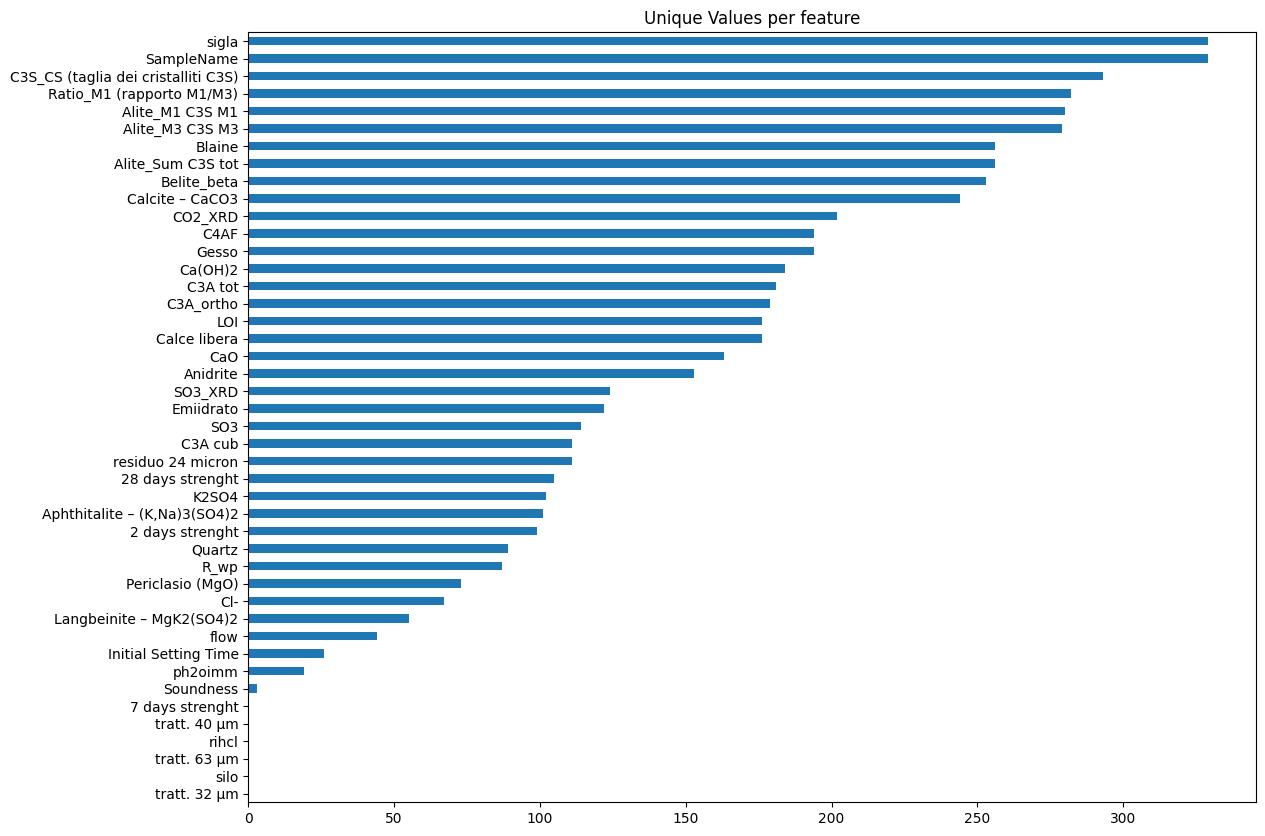

<IPython.core.display.Javascript object>

In [17]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1]), [Text(0, 0, 'CEM B  expedition control'), Text(1, 0, 'data')])

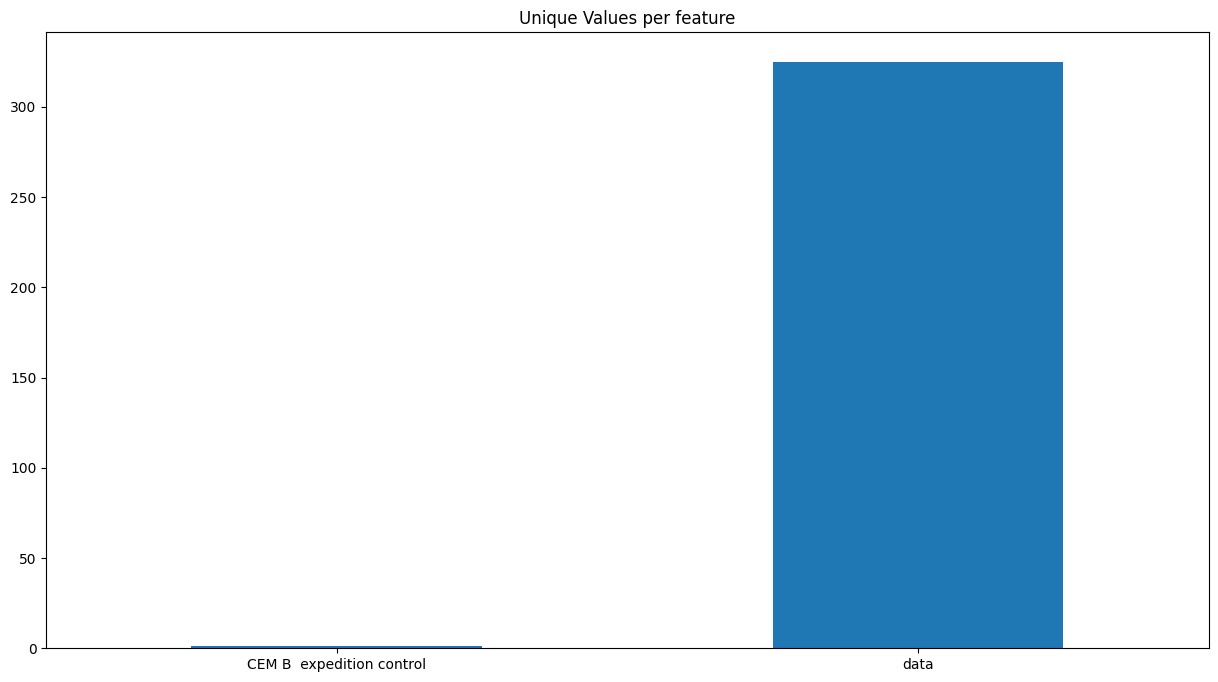

<IPython.core.display.Javascript object>

In [18]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Count of quantity of missing values')

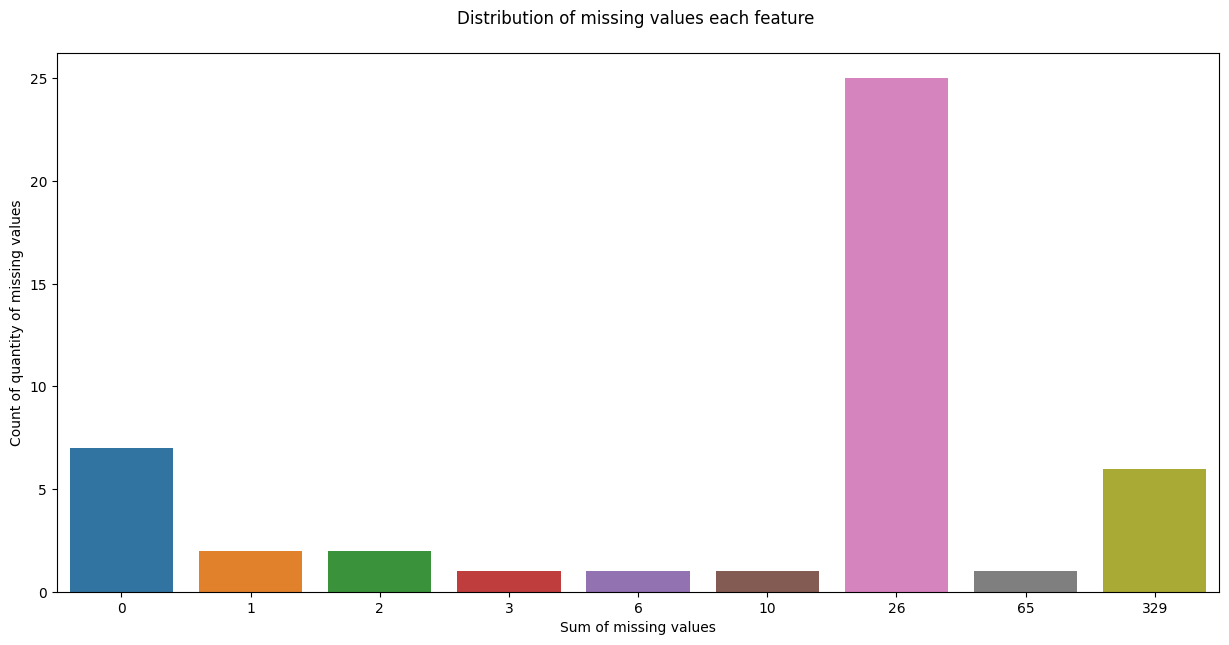

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df.isna().sum(), x=df.isna().sum().index)
plt.title("Distribution of missing values each feature \n")
plt.xlabel("Sum of missing values")
plt.ylabel("Count of quantity of missing values")

<BarContainer object of 46 artists>

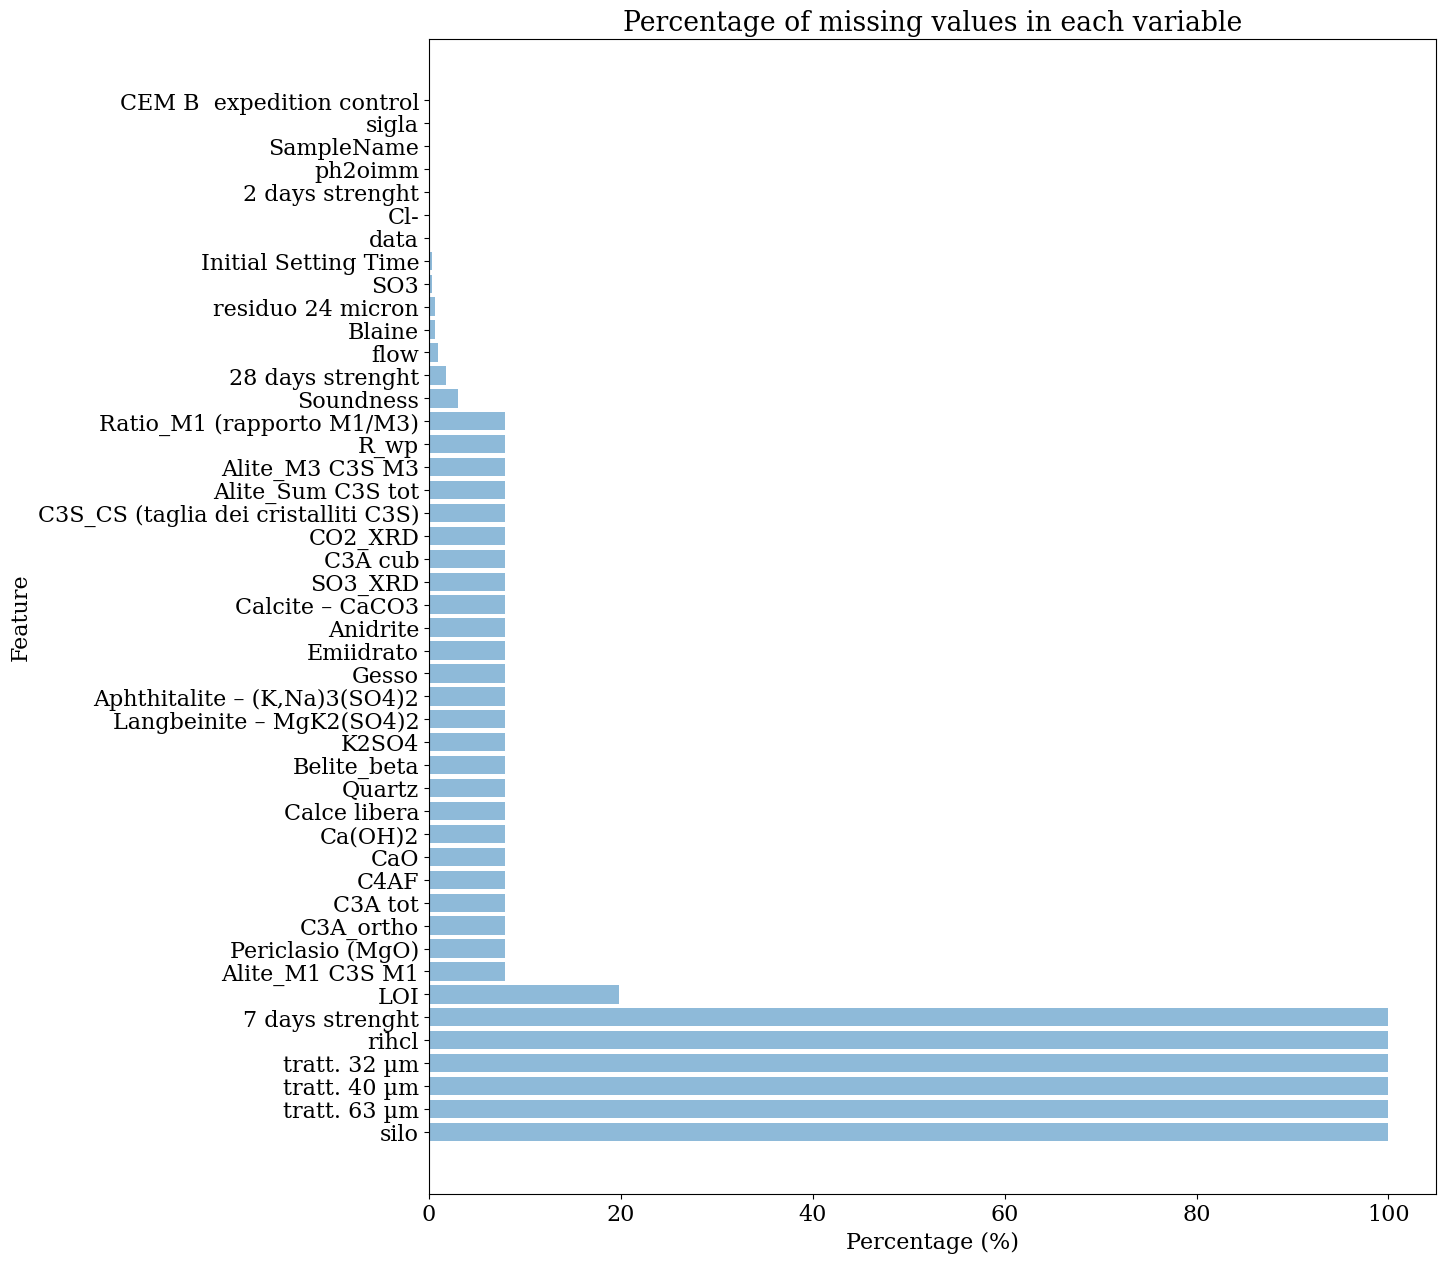

<IPython.core.display.Javascript object>

In [20]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [21]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 46 artists>

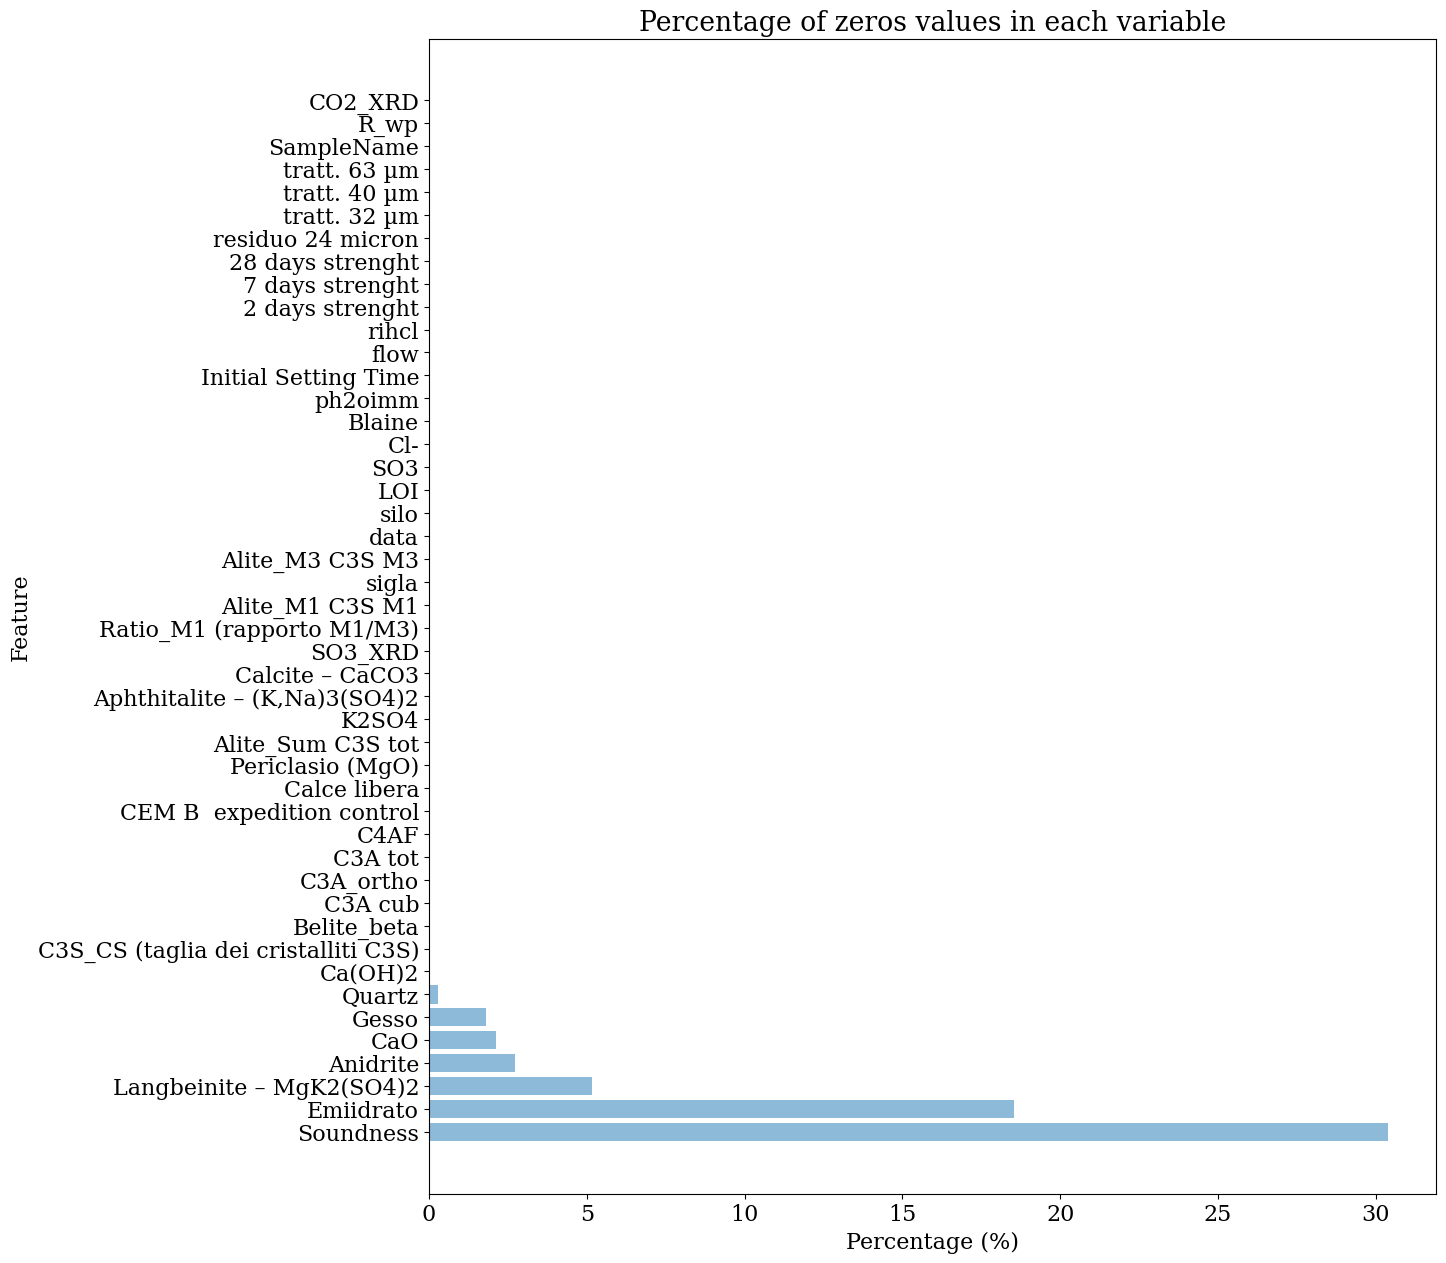

<IPython.core.display.Javascript object>

In [22]:
zeros_perc = (df == 0).sum(axis=0) / df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [23]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

In [24]:
n_duplicates = df.drop(["data"], axis=1).duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

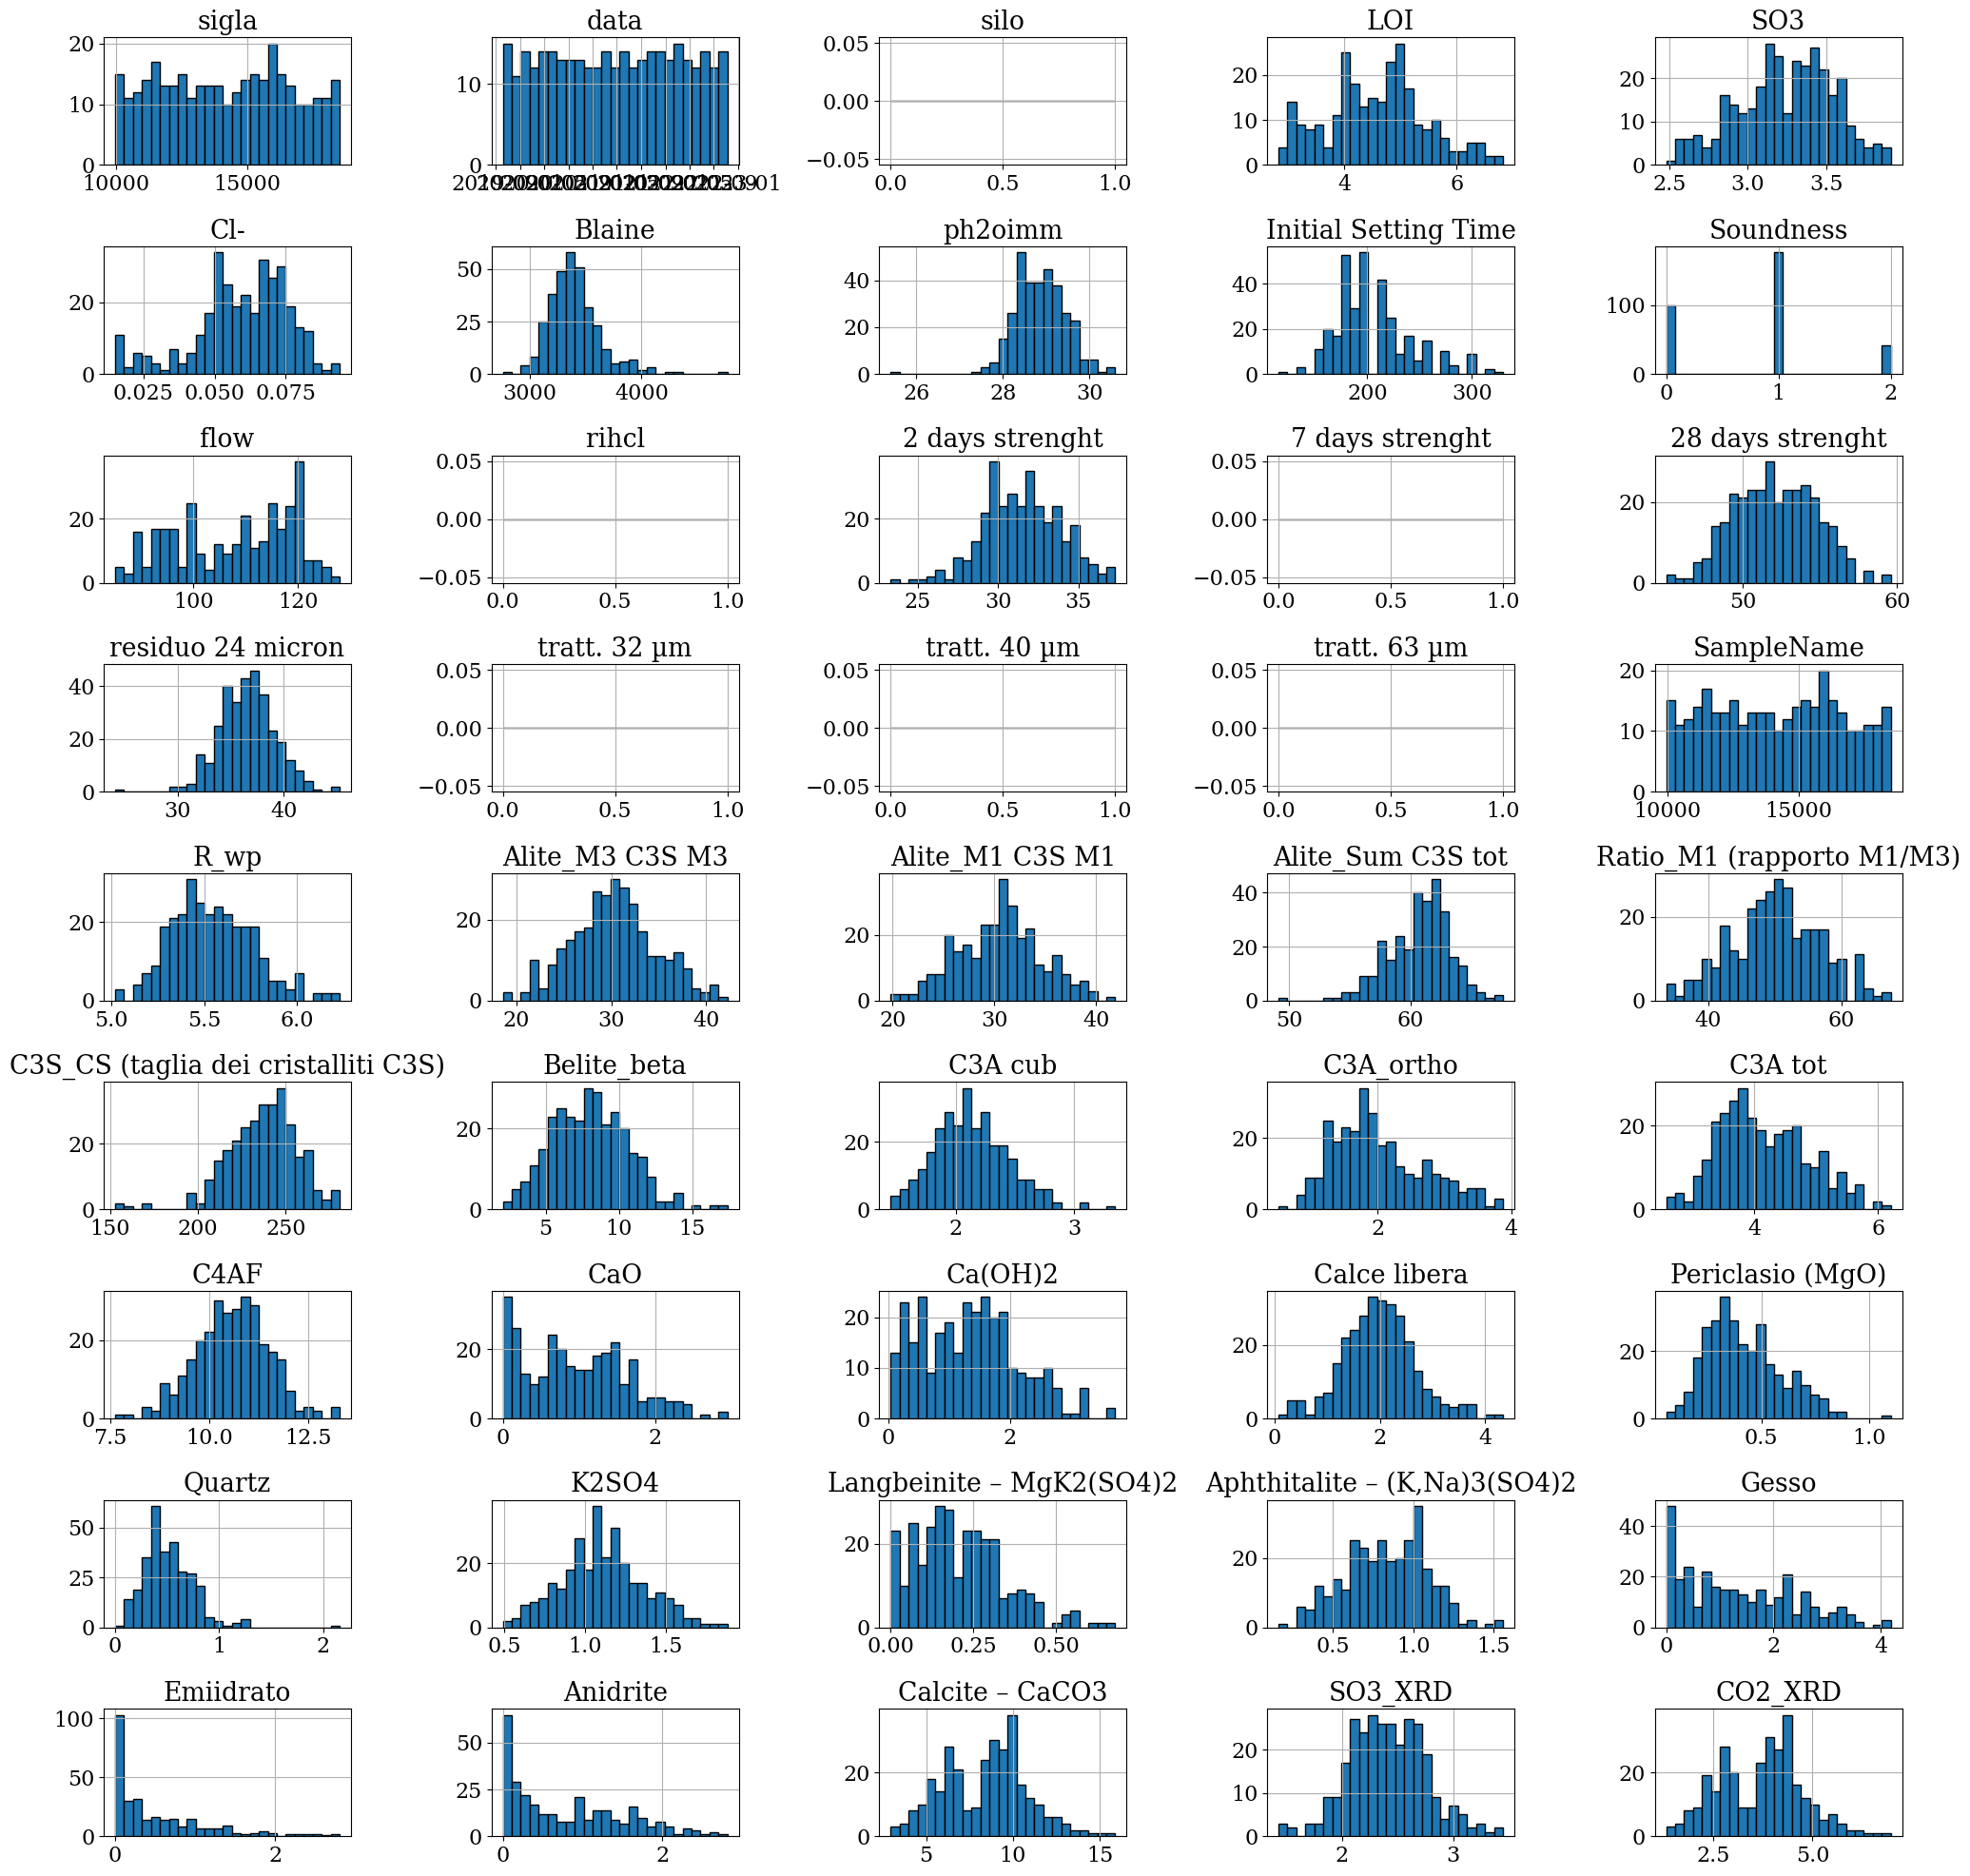

<IPython.core.display.Javascript object>

In [25]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

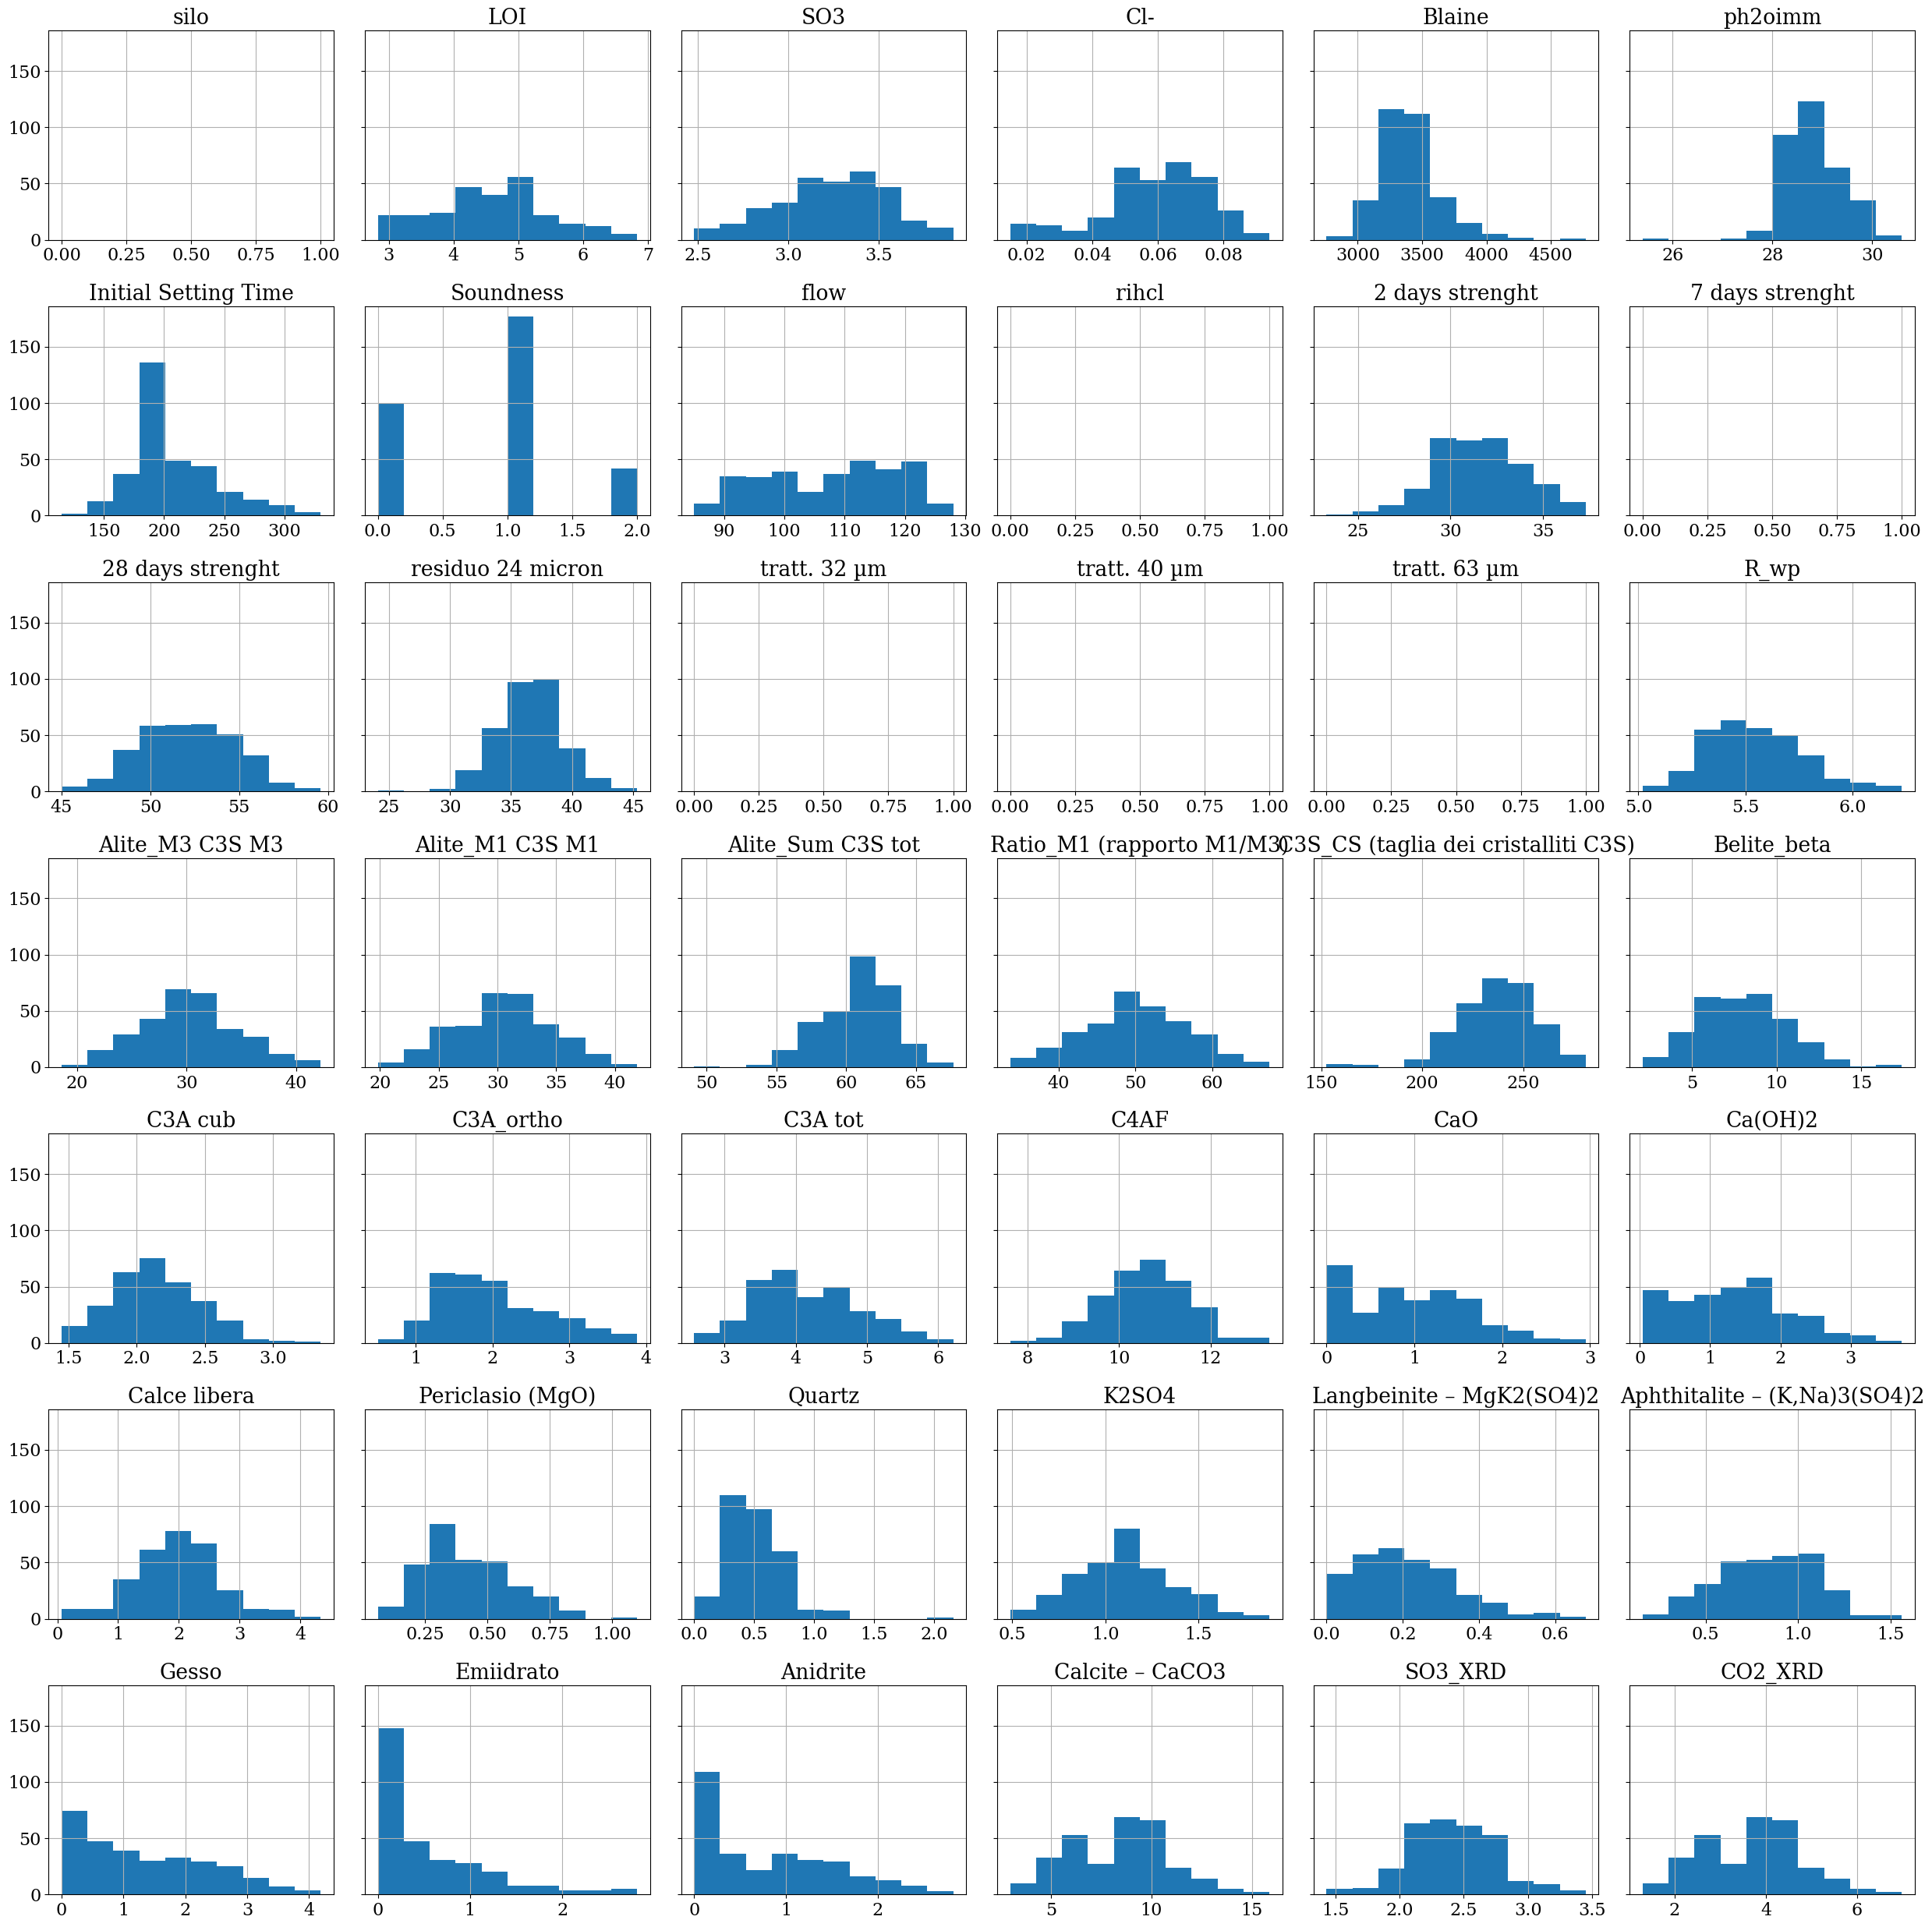

<IPython.core.display.Javascript object>

In [26]:
df.select_dtypes(include="float64").hist(figsize=(25, 25), sharey=True)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

/tmp/ipykernel_165341/1812677160.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_165341/1812677160.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_165341/1812677160.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_165341/1812677160.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_165341/1812677160.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_165341/1812677160.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[c

/tmp/ipykernel_165341/1812677160.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_165341/1812677160.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before op

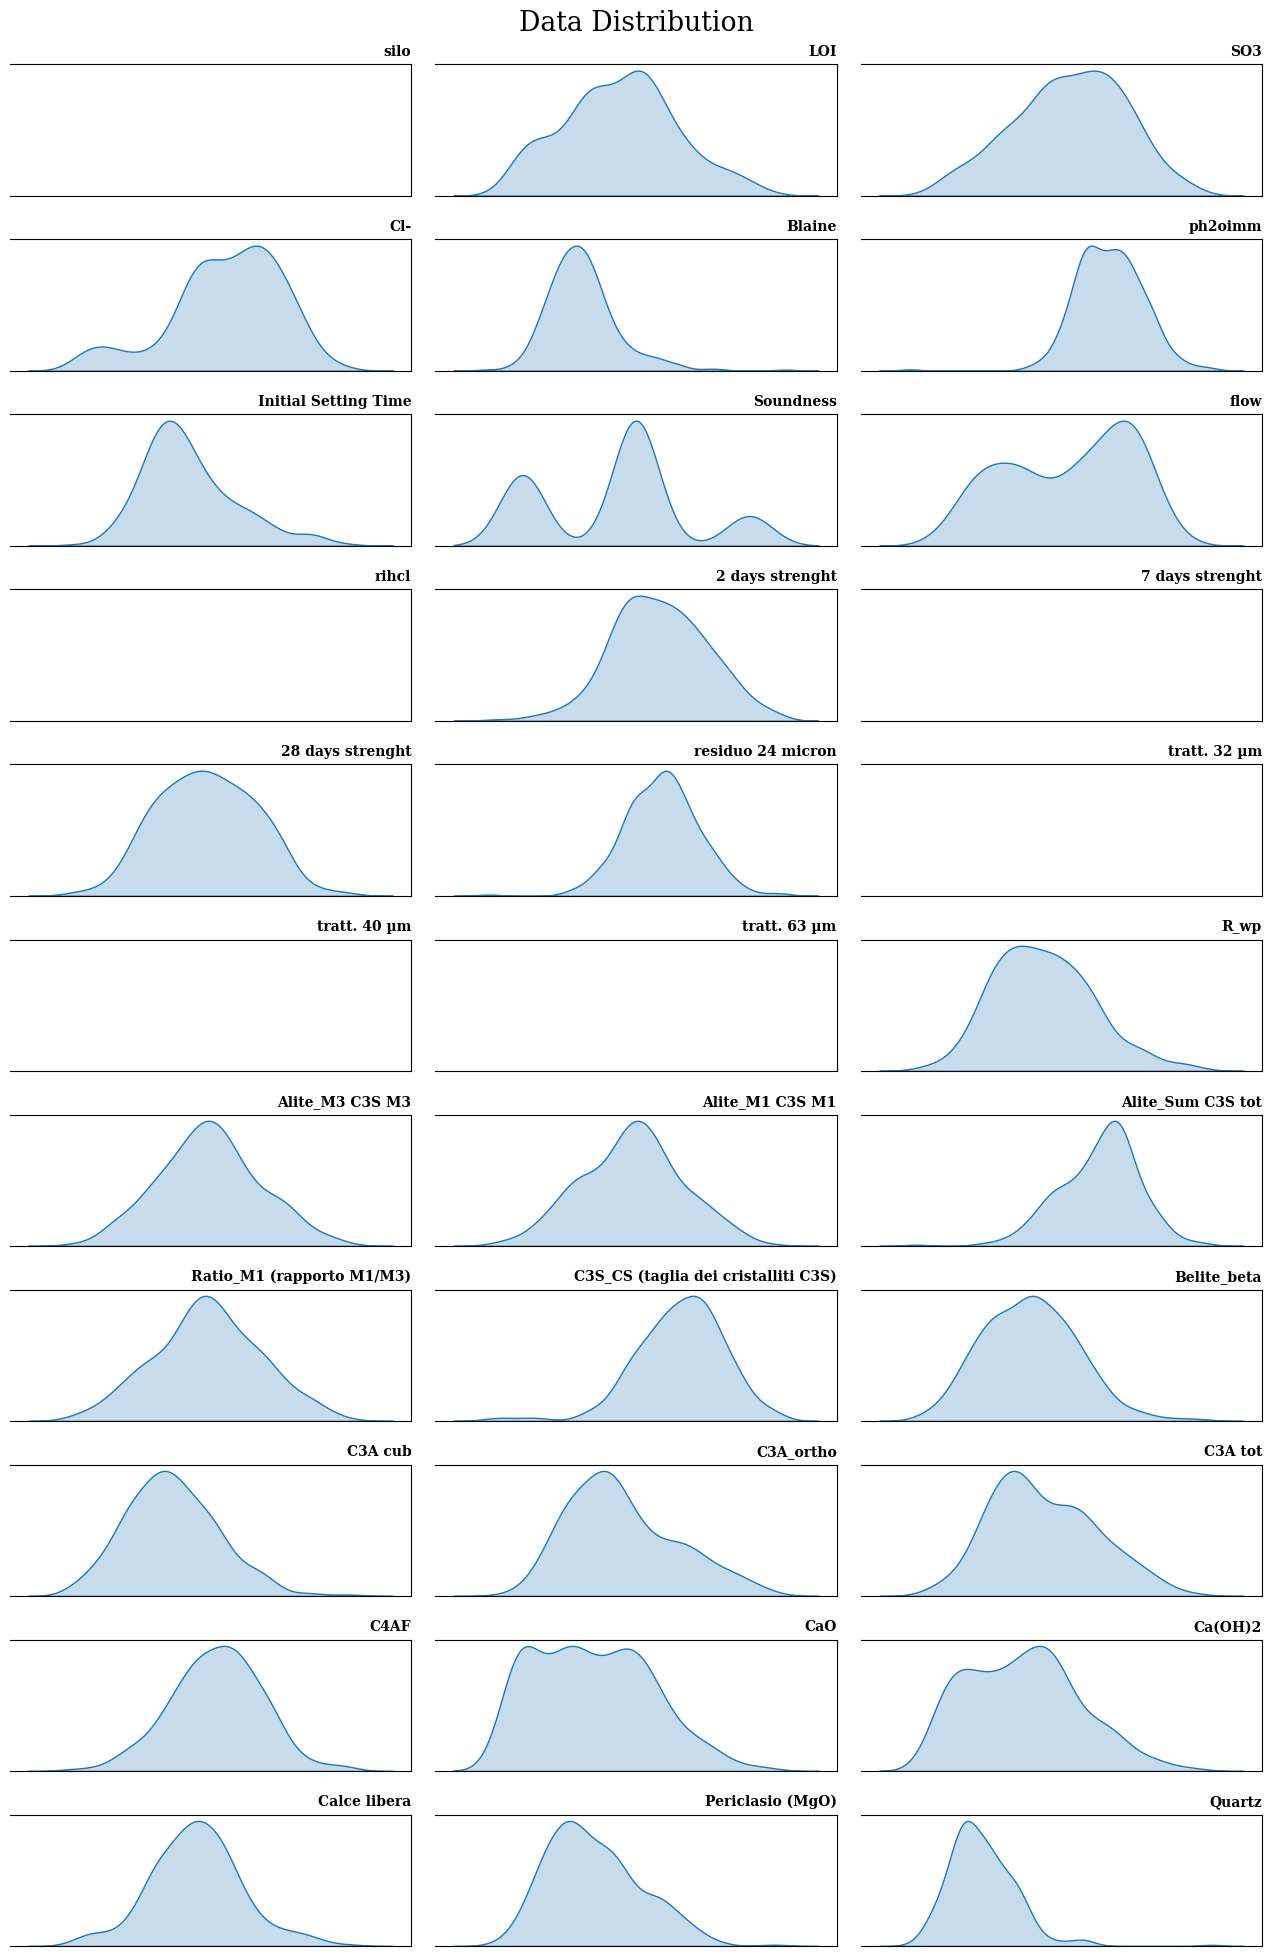

<IPython.core.display.Javascript object>

In [27]:
fig, axes = plt.subplots(11, 3, figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

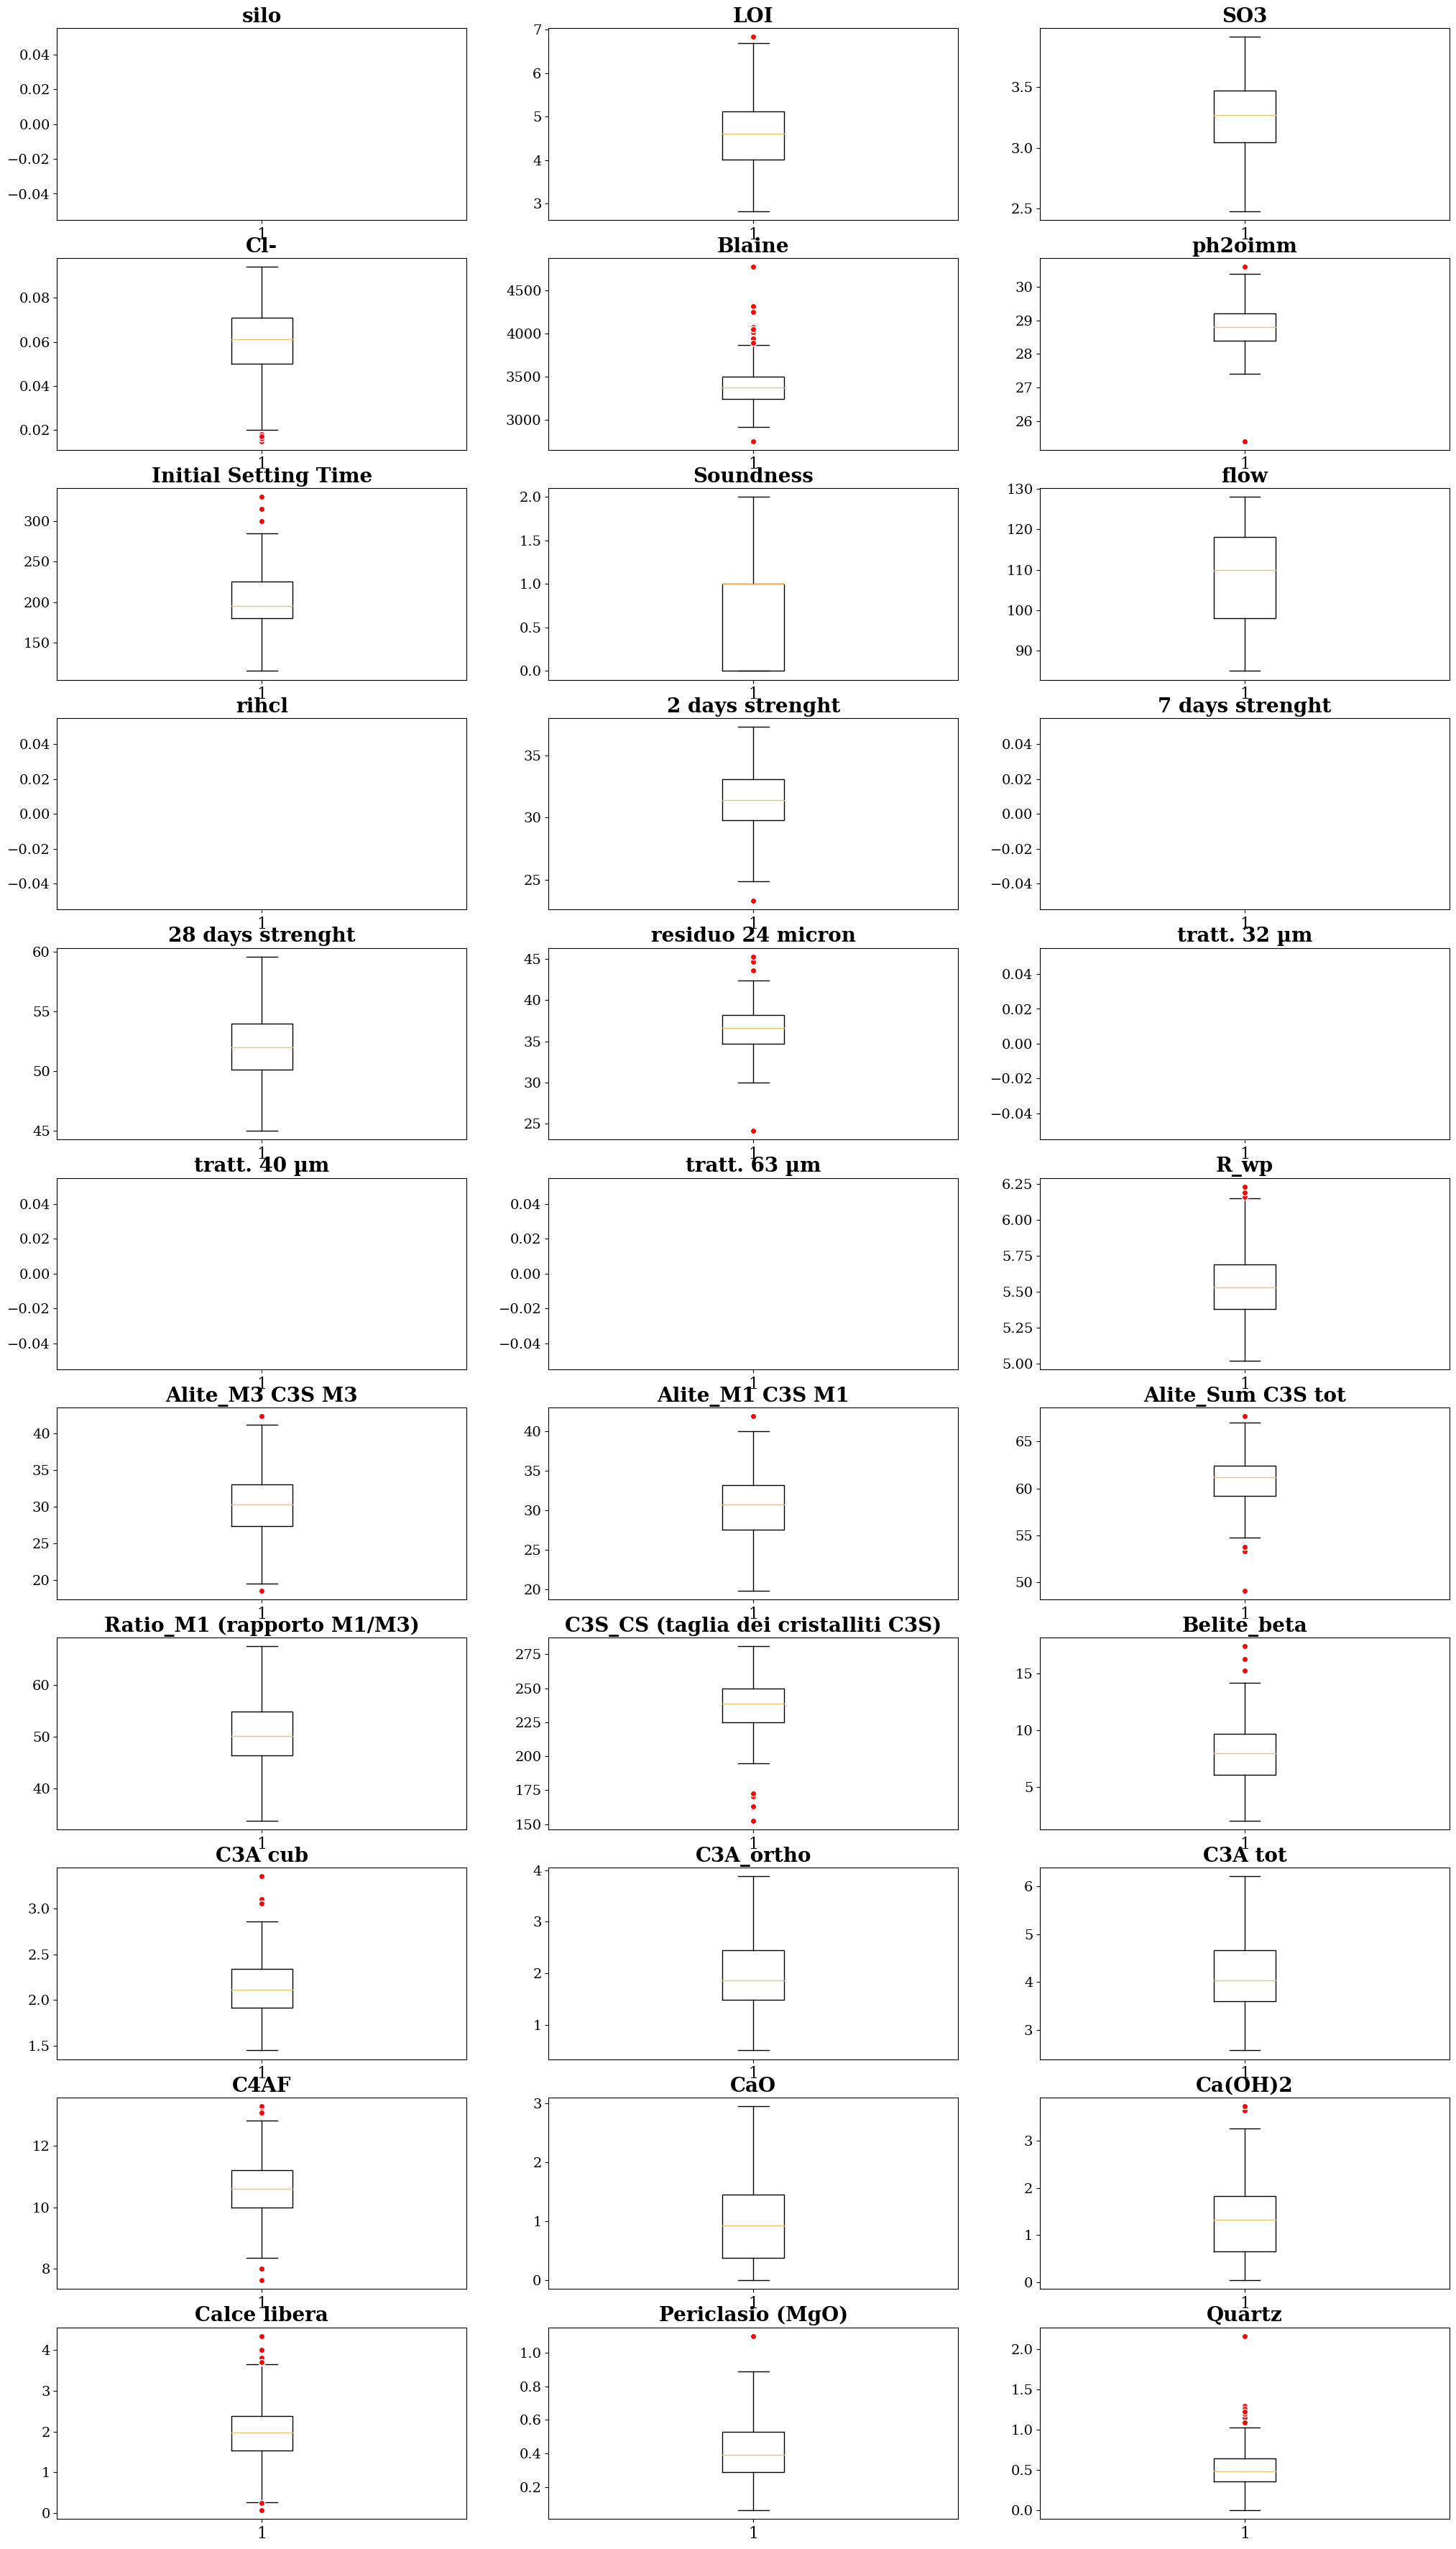

<IPython.core.display.Javascript object>

In [28]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(11, 3, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

<Axes: >

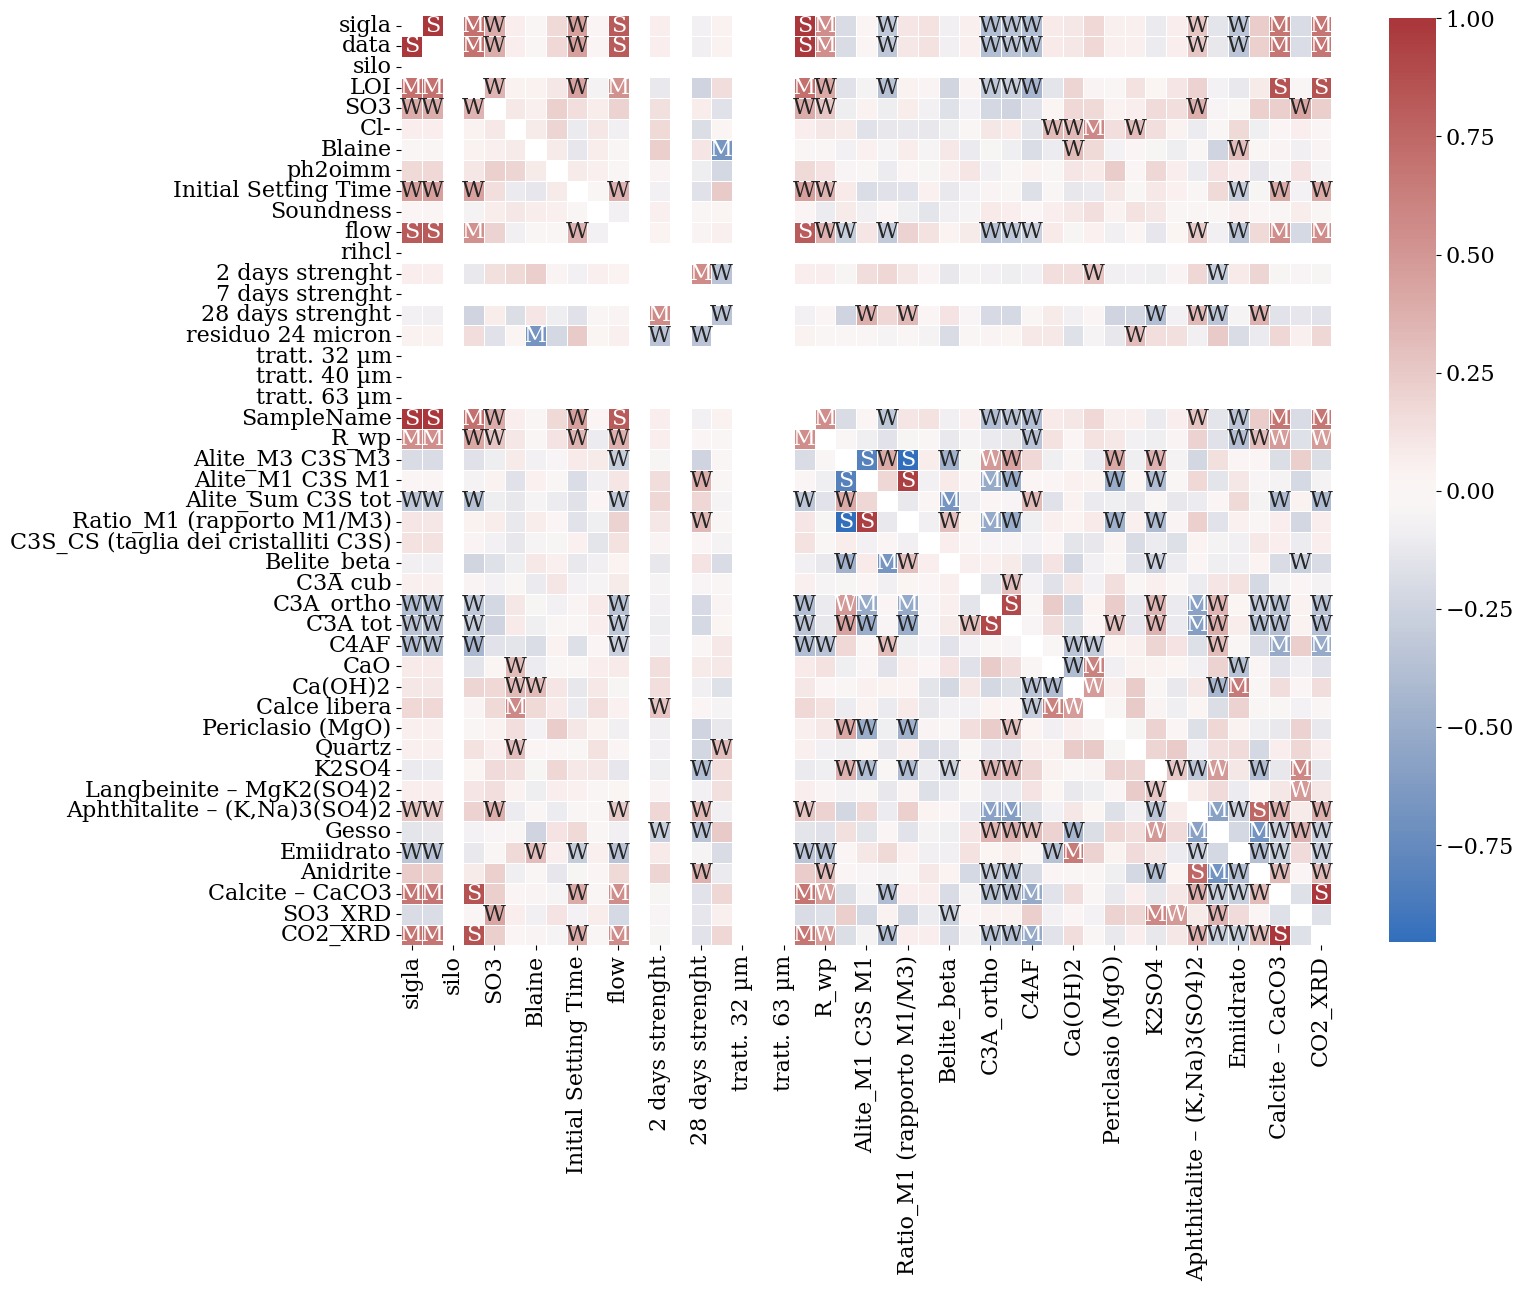

<IPython.core.display.Javascript object>

In [29]:
df_corr = df.select_dtypes(exclude=object).corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) >= 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

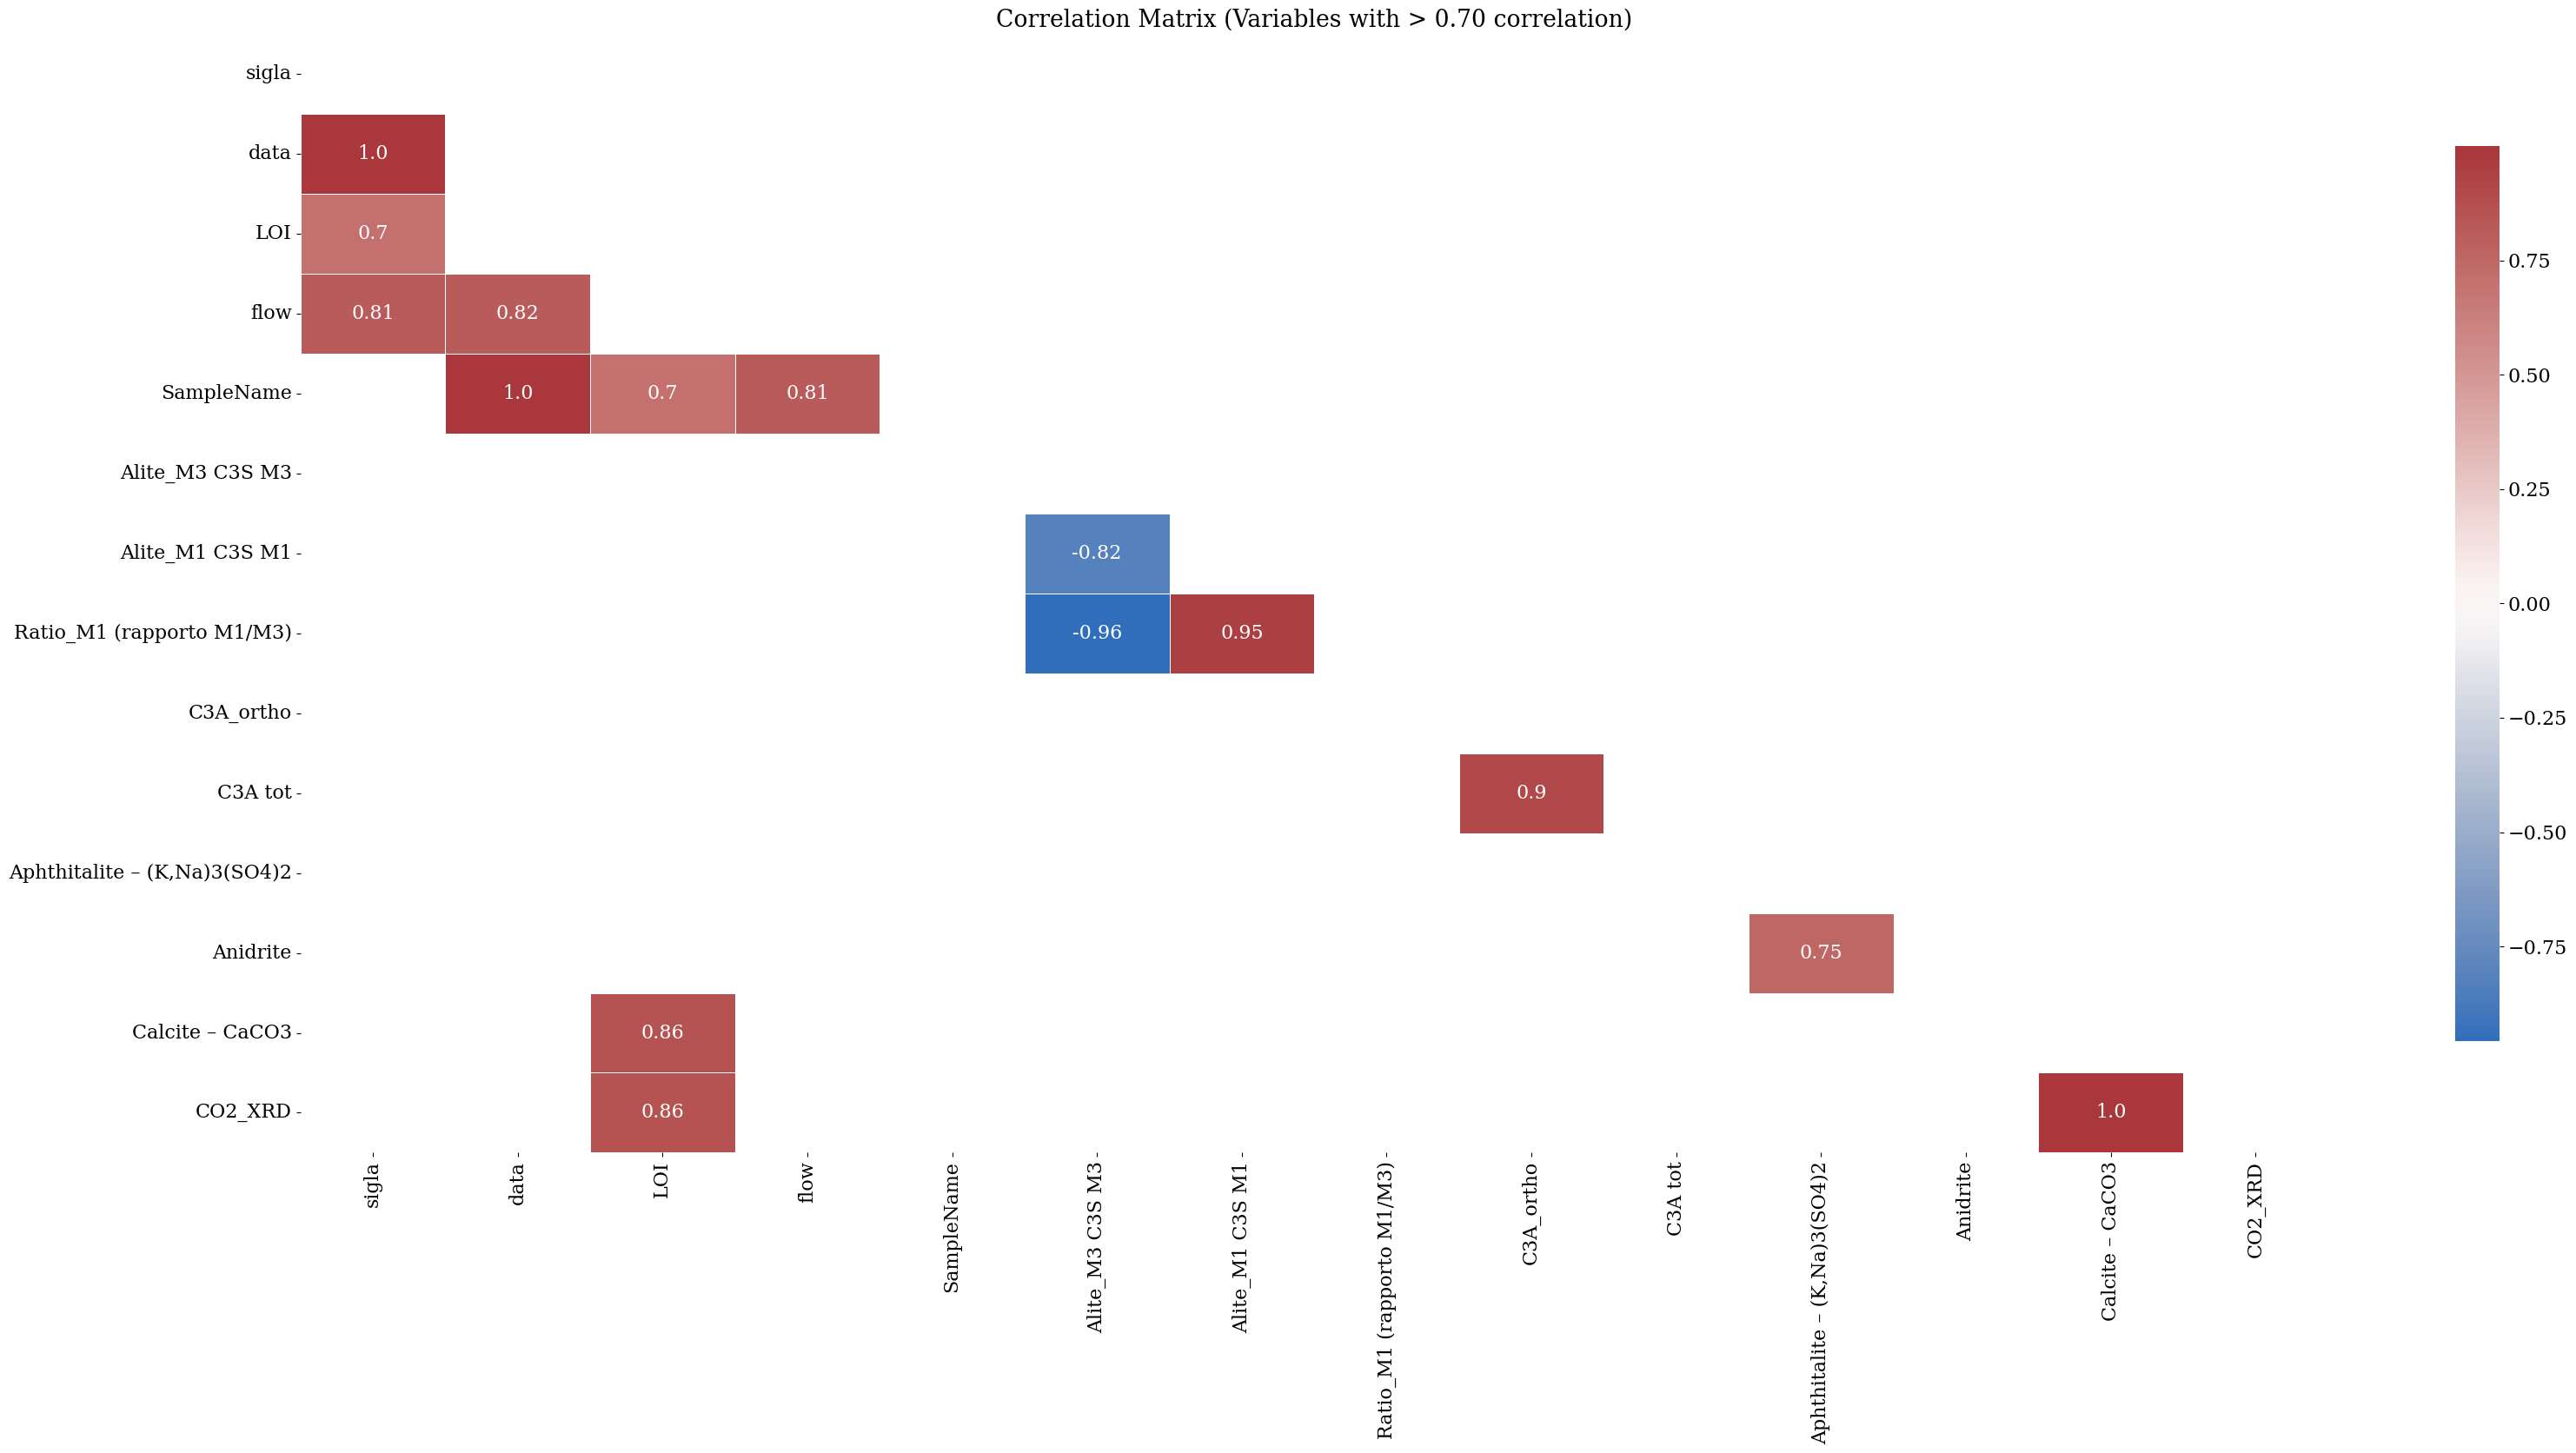

<IPython.core.display.Javascript object>

In [30]:
df_corr = df.select_dtypes(exclude=object).corr(method="pearson")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [31]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

sigla                         SampleName                   1.000000
Calcite – CaCO3               CO2_XRD                      0.999996
sigla                         data                         0.999633
data                          SampleName                   0.999633
Alite_M3 C3S M3               Ratio_M1 (rapporto M1/M3)    0.956300
Alite_M1 C3S M1               Ratio_M1 (rapporto M1/M3)    0.951914
C3A_ortho                     C3A tot                      0.901397
LOI                           CO2_XRD                      0.860966
                              Calcite – CaCO3              0.860947
Alite_M3 C3S M3               Alite_M1 C3S M1              0.823948
data                          flow                         0.816526
flow                          SampleName                   0.814978
sigla                         flow                         0.814978
Aphthitalite – (K,Na)3(SO4)2  Anidrite                     0.751417
LOI                           SampleName        

<IPython.core.display.Javascript object>

In [32]:
sol[sol.index.map(lambda x: "28 days strenght" in x)]

2 days strenght       28 days strenght                       0.562623
28 days strenght      K2SO4                                  0.387518
                      Alite_M1 C3S M1                        0.375578
                      Anidrite                               0.360338
                      residuo 24 micron                      0.350538
                      Gesso                                  0.342154
                      Aphthitalite – (K,Na)3(SO4)2           0.324932
                      Ratio_M1 (rapporto M1/M3)              0.324473
                      Alite_M3 C3S M3                        0.240354
                      Periclasio (MgO)                       0.238541
LOI                   28 days strenght                       0.238421
28 days strenght      Quartz                                 0.226290
                      C3A tot                                0.214308
                      C3A_ortho                              0.205018
                    

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

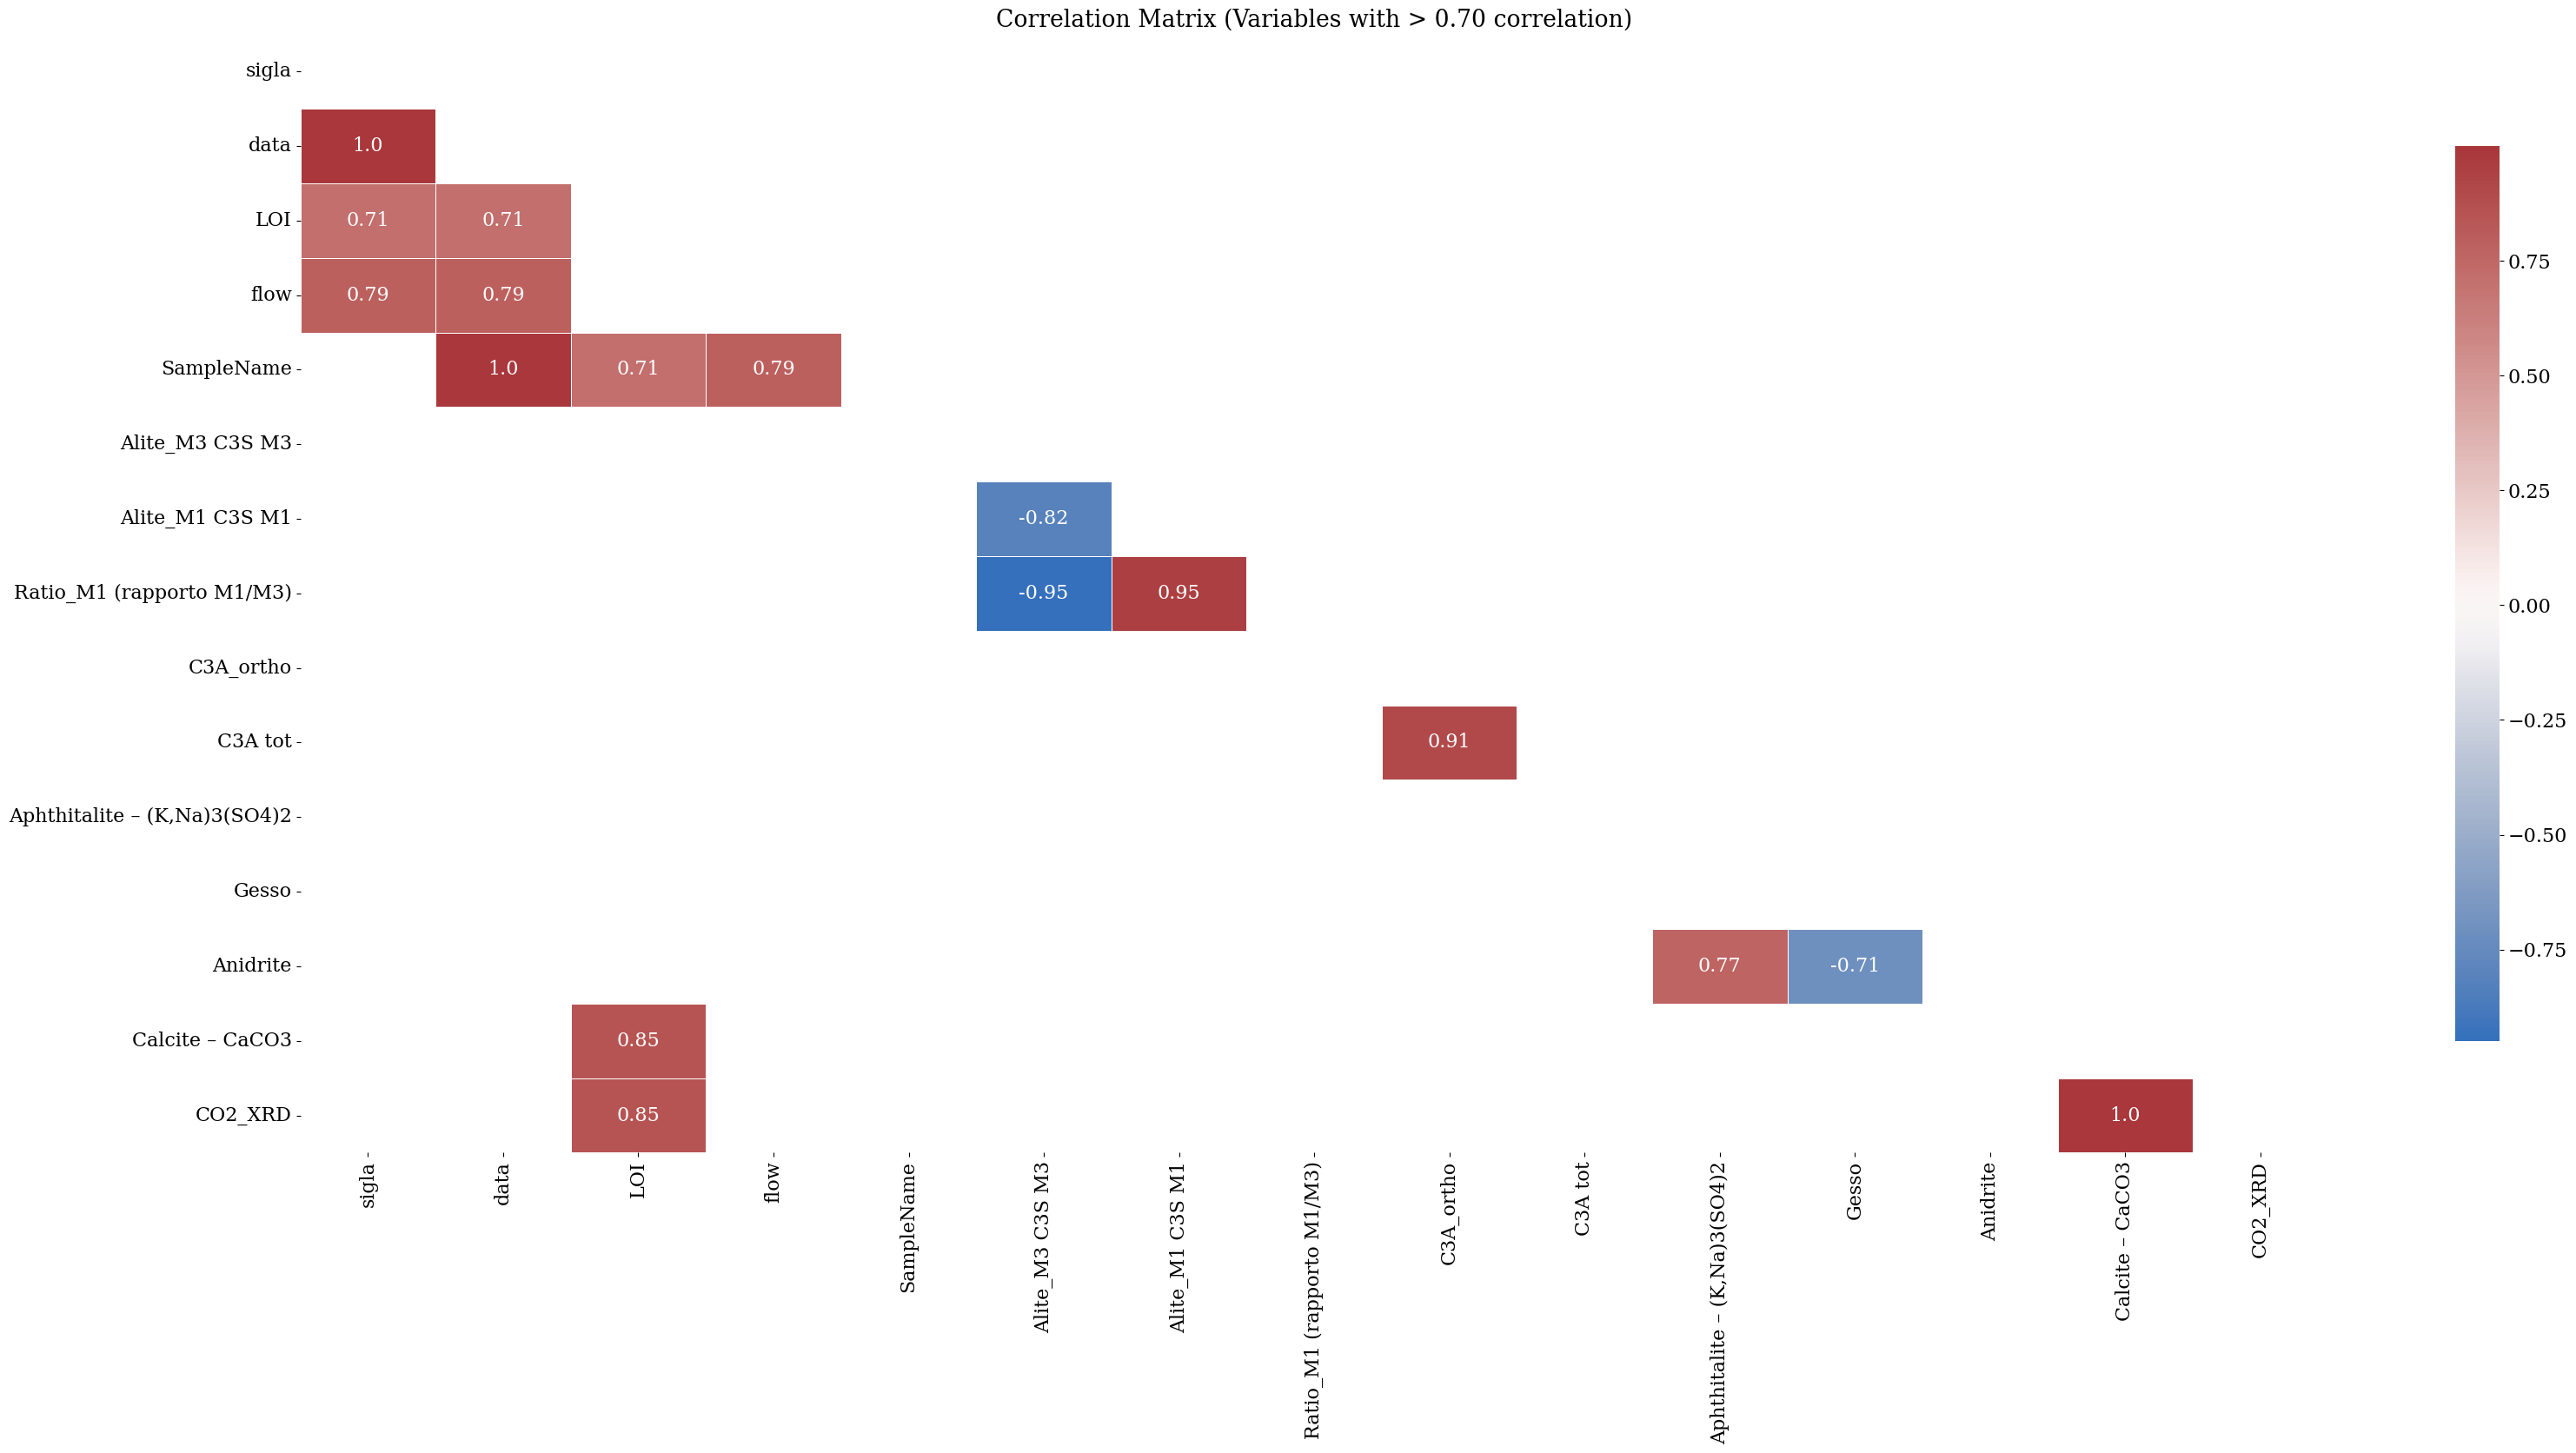

<IPython.core.display.Javascript object>

In [33]:
df_corr = df.select_dtypes(exclude=object).corr(method="spearman")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [34]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="spearman").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

sigla                         SampleName                   1.000000
Calcite – CaCO3               CO2_XRD                      0.999983
sigla                         data                         0.999969
data                          SampleName                   0.999969
Alite_M1 C3S M1               Ratio_M1 (rapporto M1/M3)    0.951575
Alite_M3 C3S M3               Ratio_M1 (rapporto M1/M3)    0.948886
C3A_ortho                     C3A tot                      0.906491
LOI                           Calcite – CaCO3              0.850660
                              CO2_XRD                      0.850651
Alite_M3 C3S M3               Alite_M1 C3S M1              0.816170
data                          flow                         0.793693
sigla                         flow                         0.793669
flow                          SampleName                   0.793669
Aphthitalite – (K,Na)3(SO4)2  Anidrite                     0.769621
Gesso                         Anidrite          

<IPython.core.display.Javascript object>

In [35]:
sol[sol.index.map(lambda x: "28 days strenght" in x)]

2 days strenght       28 days strenght                       0.562668
28 days strenght      Alite_M1 C3S M1                        0.361886
                      K2SO4                                  0.361509
                      Gesso                                  0.351957
                      residuo 24 micron                      0.325849
                      Ratio_M1 (rapporto M1/M3)              0.320678
                      Anidrite                               0.308375
                      Aphthitalite – (K,Na)3(SO4)2           0.298105
                      Alite_M3 C3S M3                        0.254180
LOI                   28 days strenght                       0.243399
Cl-                   28 days strenght                       0.231876
28 days strenght      Quartz                                 0.216002
                      C3A tot                                0.193238
                      Periclasio (MgO)                       0.187925
                    

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

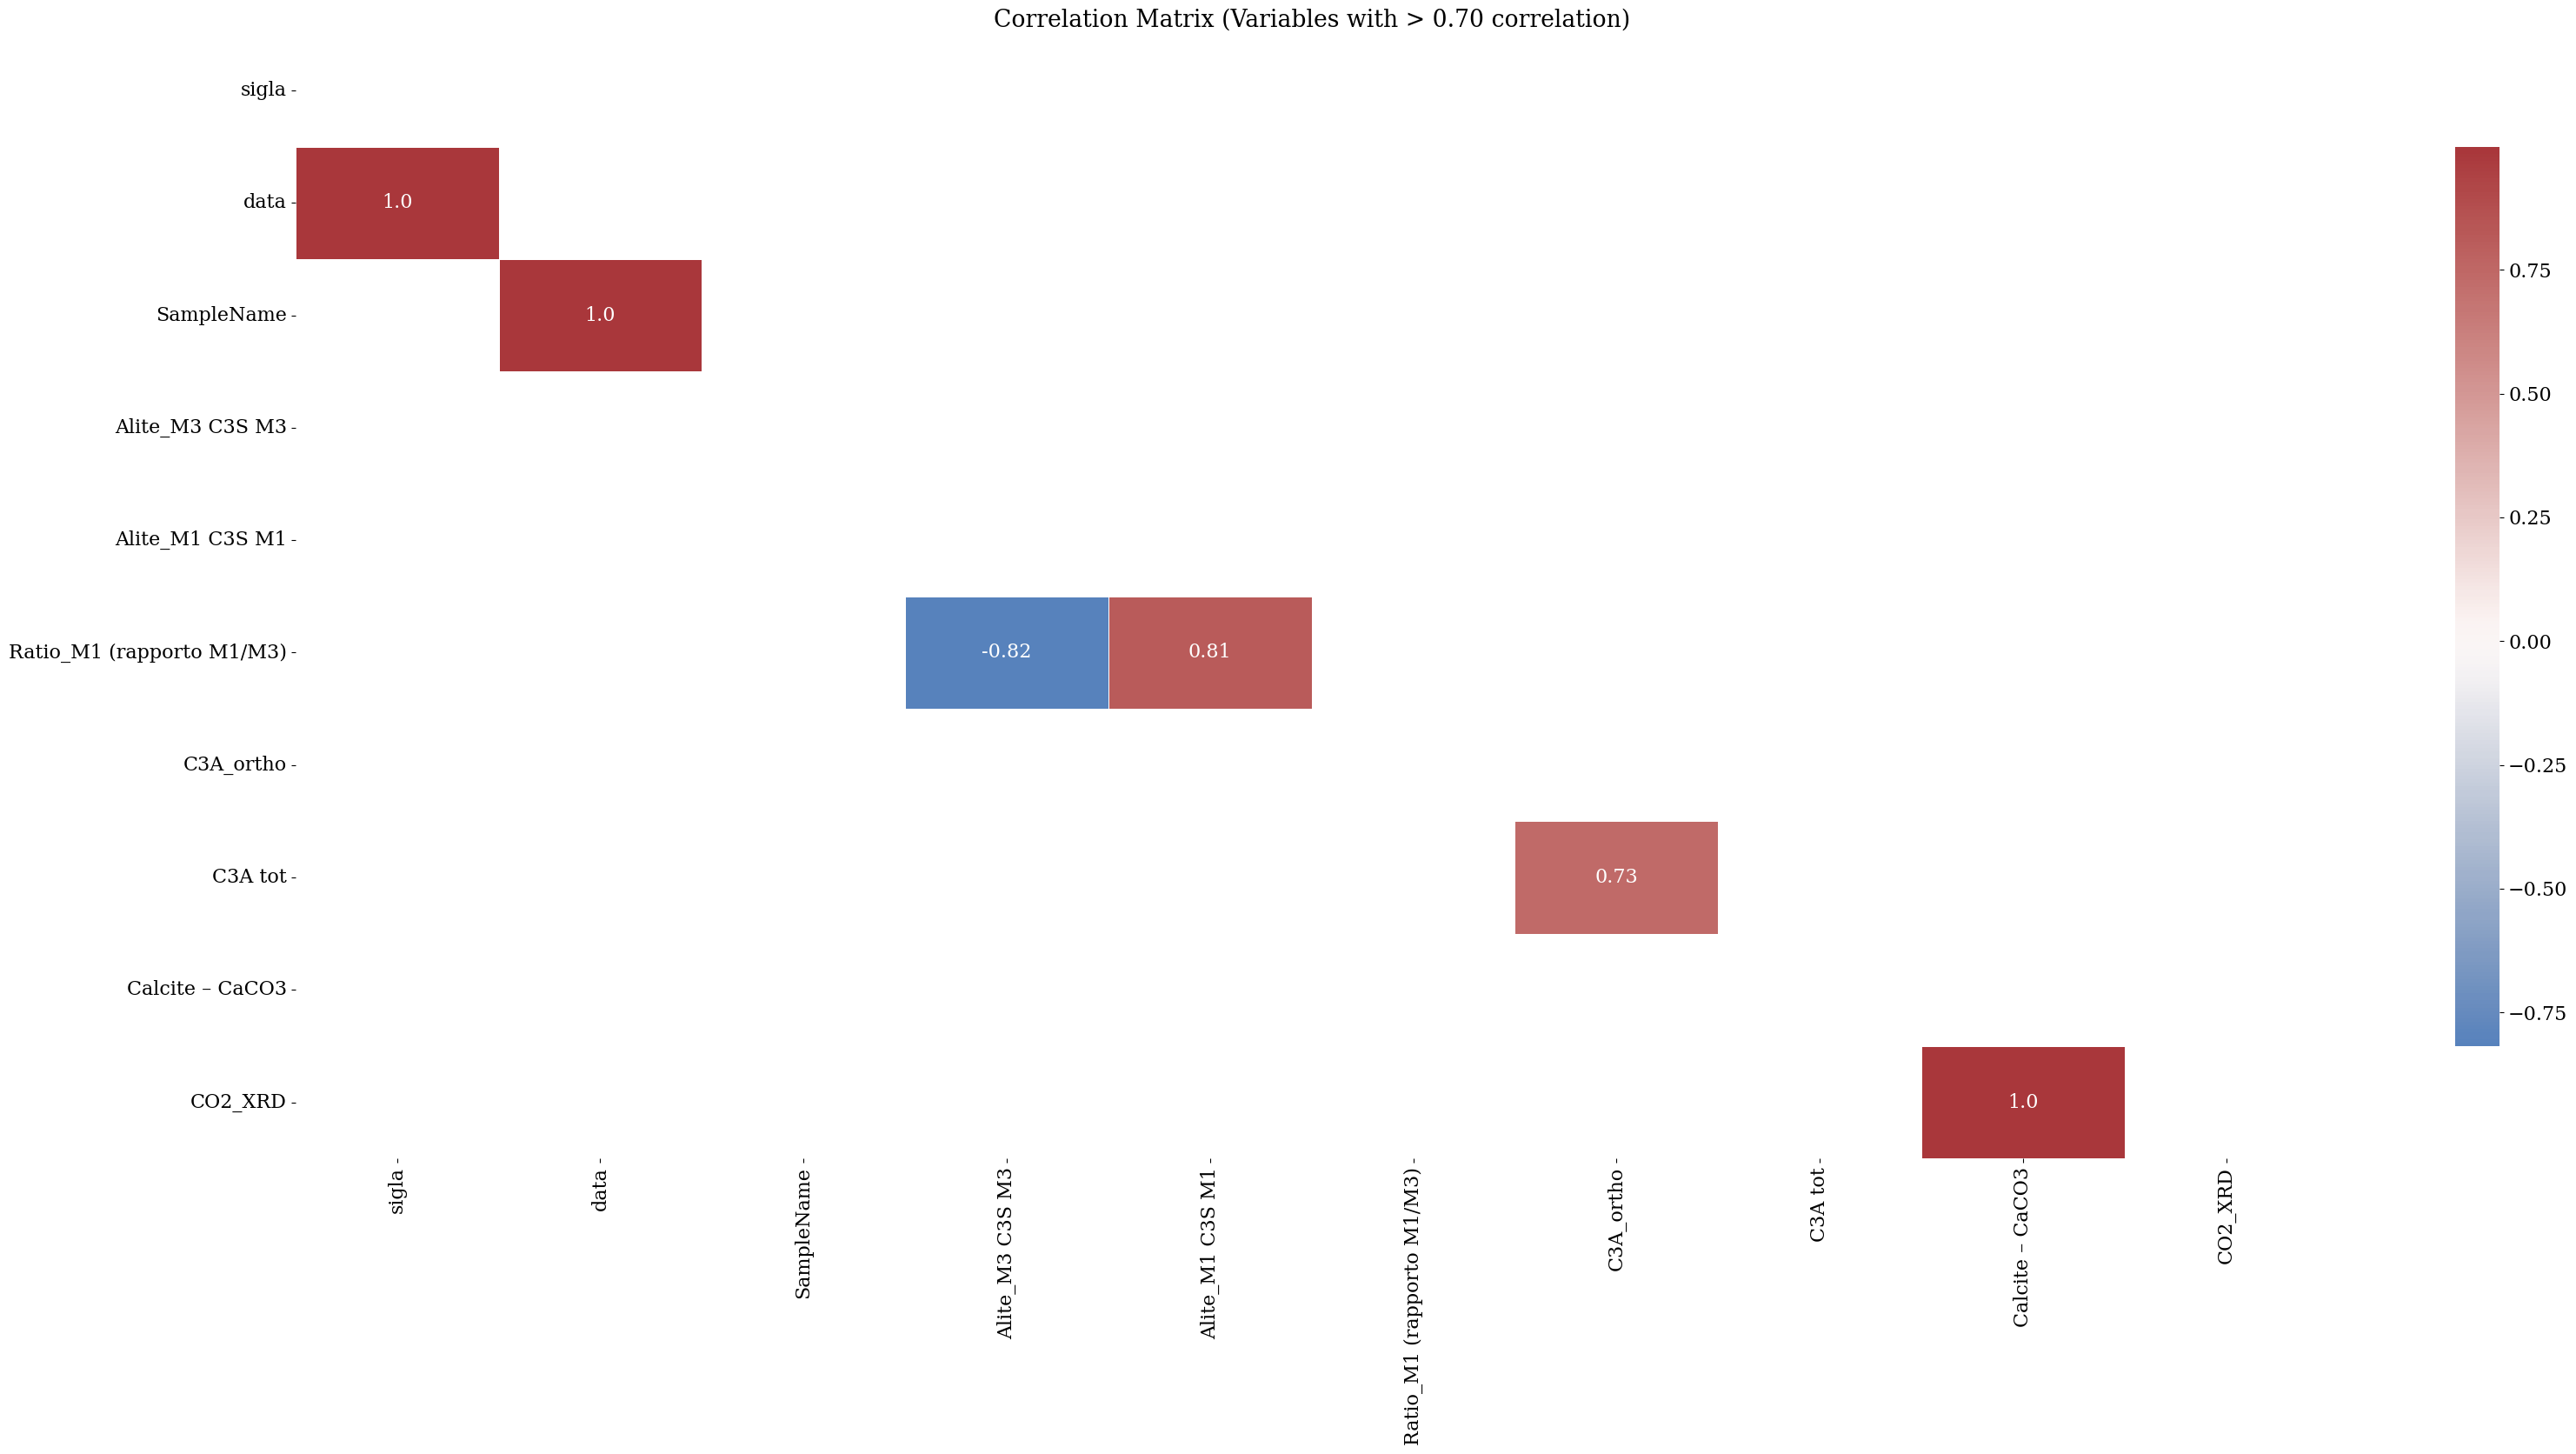

<IPython.core.display.Javascript object>

In [36]:


df_corr = df.select_dtypes(exclude=object).corr(method="kendall")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()



In [37]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="kendall").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

sigla            SampleName                   1.000000
                 data                         0.999110
data             SampleName                   0.999110
Calcite – CaCO3  CO2_XRD                      0.999014
Alite_M3 C3S M3  Ratio_M1 (rapporto M1/M3)    0.818212
Alite_M1 C3S M1  Ratio_M1 (rapporto M1/M3)    0.812801
C3A_ortho        C3A tot                      0.733366
dtype: float64

<IPython.core.display.Javascript object>

In [38]:
sol[sol.index.map(lambda x: "28 days strenght" in x)]

2 days strenght       28 days strenght                       0.399456
28 days strenght      K2SO4                                  0.250681
                      Alite_M1 C3S M1                        0.246778
                      Gesso                                  0.240742
                      residuo 24 micron                      0.223138
                      Ratio_M1 (rapporto M1/M3)              0.216122
                      Anidrite                               0.211978
                      Aphthitalite – (K,Na)3(SO4)2           0.202236
                      Alite_M3 C3S M3                        0.171846
LOI                   28 days strenght                       0.157761
Cl-                   28 days strenght                       0.152390
28 days strenght      Quartz                                 0.147130
                      C3A tot                                0.131002
                      Periclasio (MgO)                       0.130047
                    

<IPython.core.display.Javascript object>

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

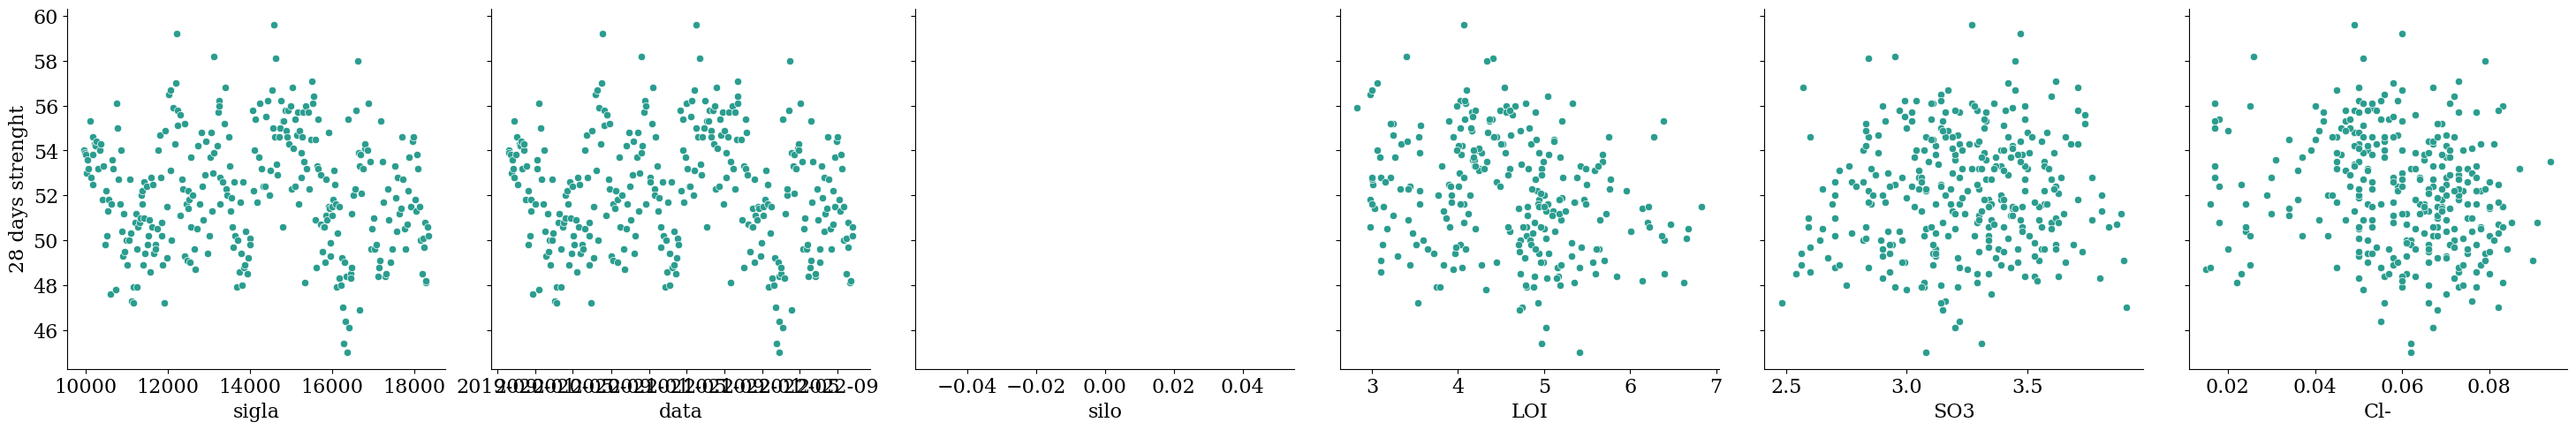

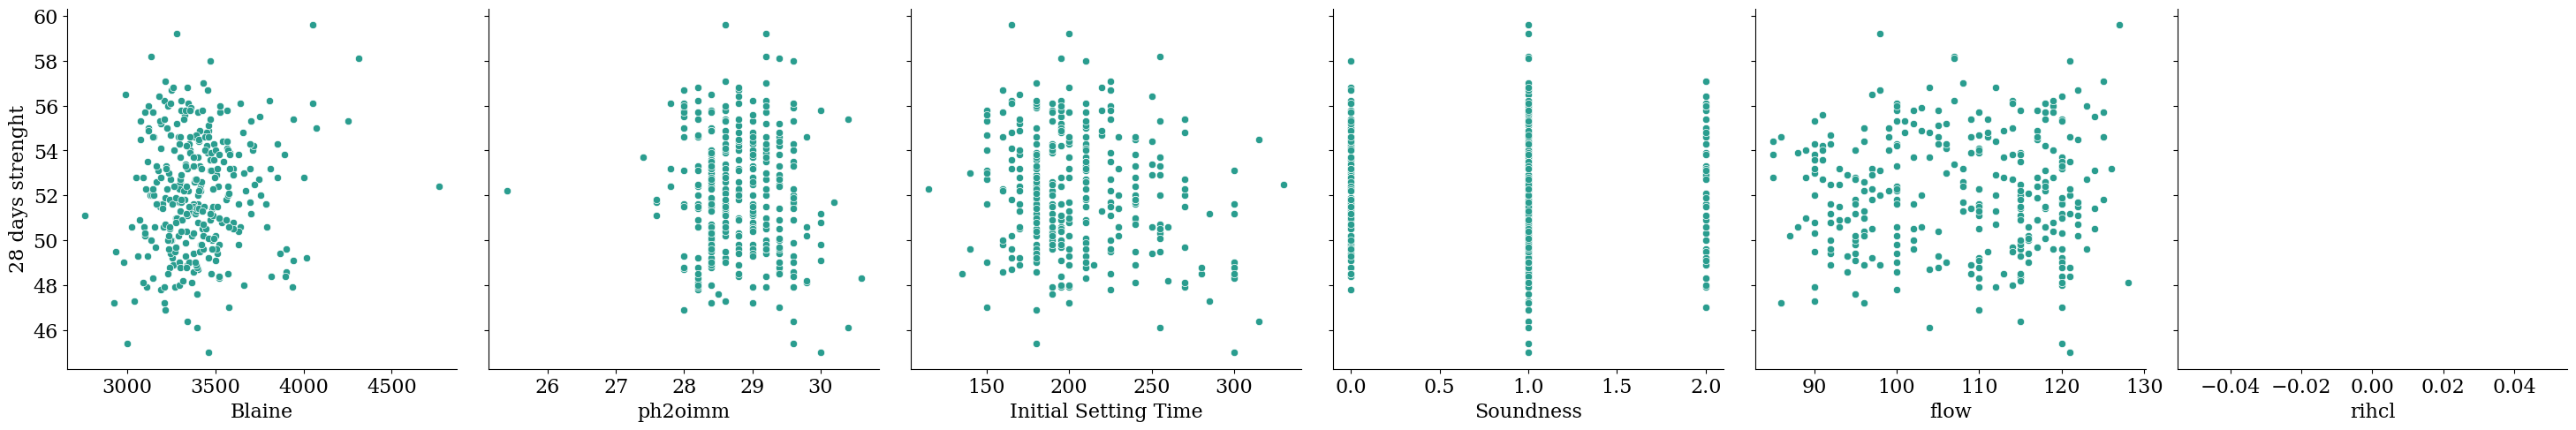

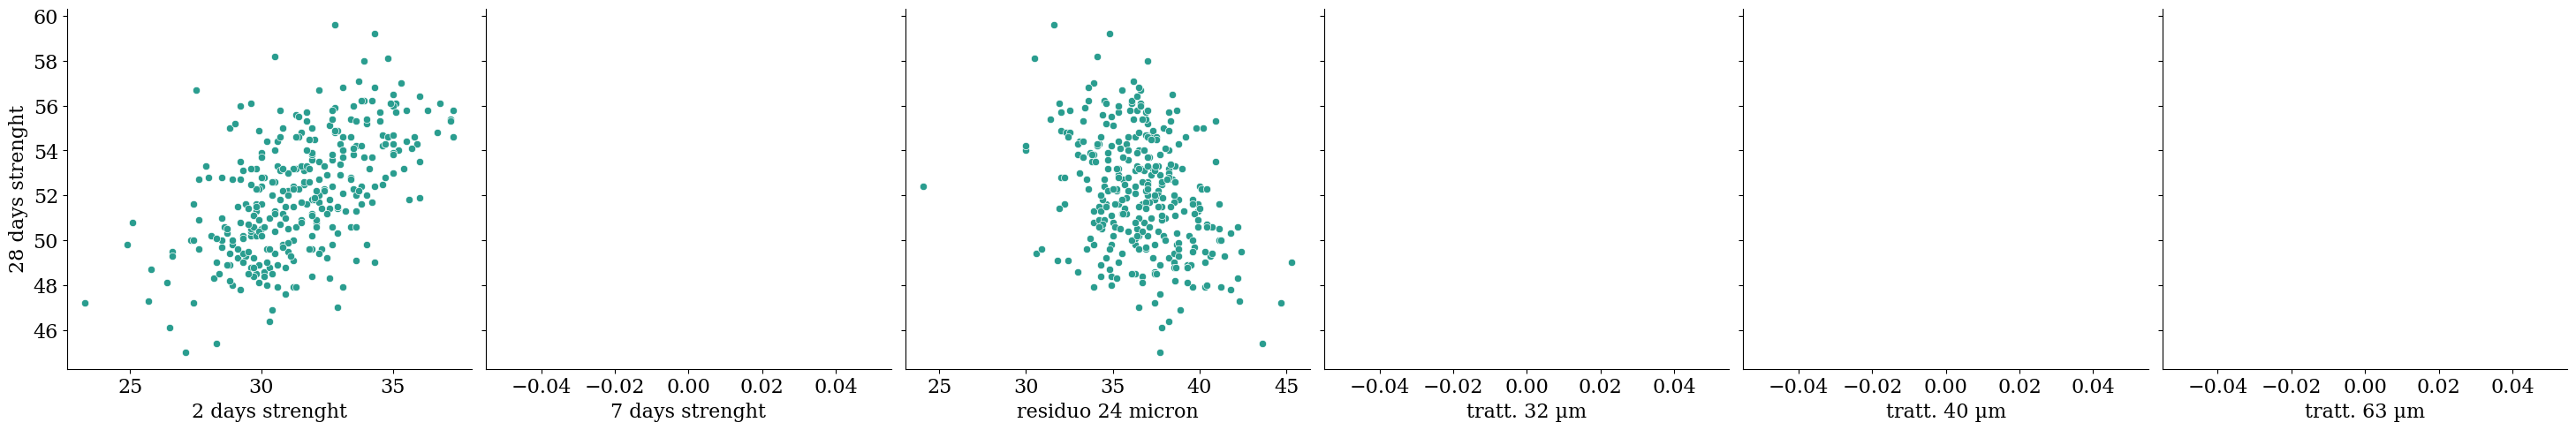

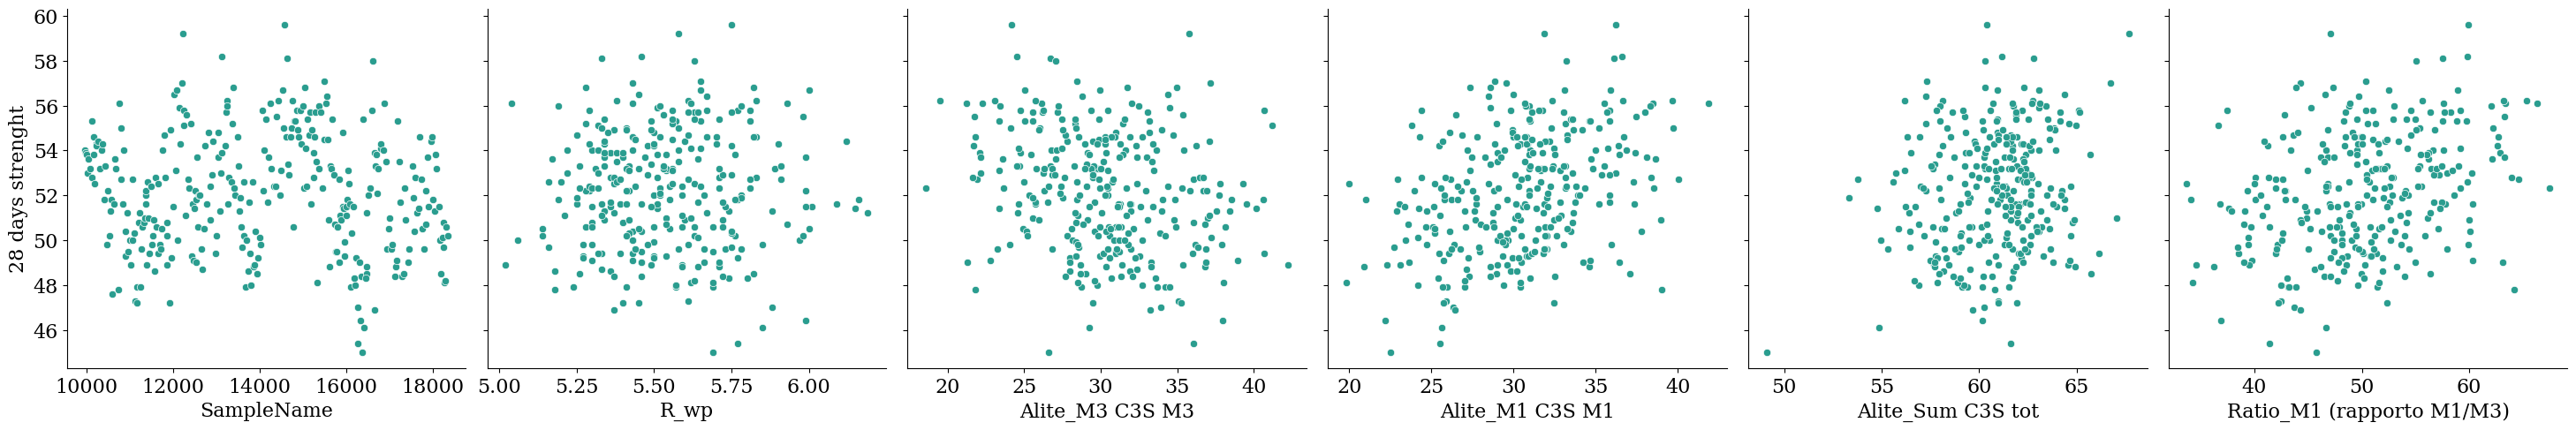

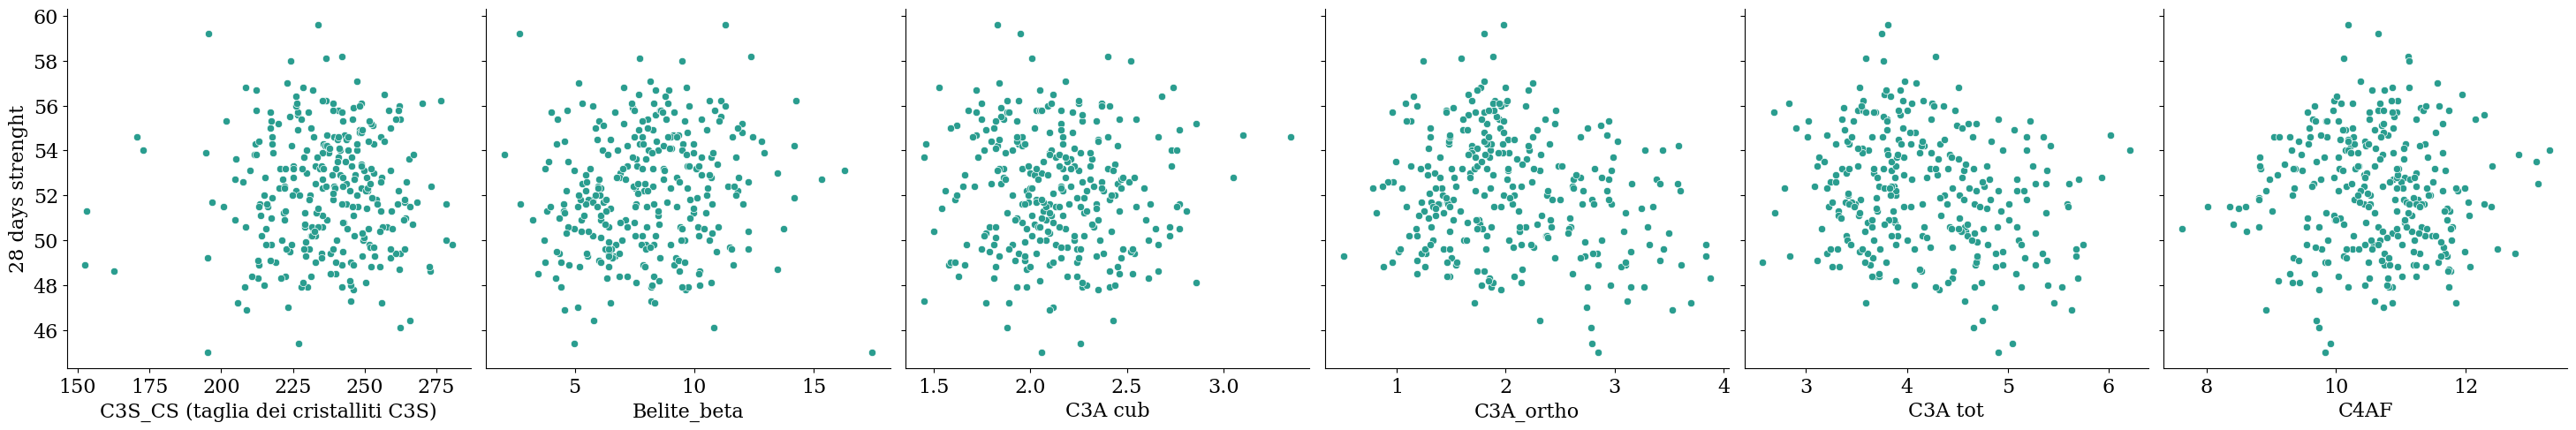

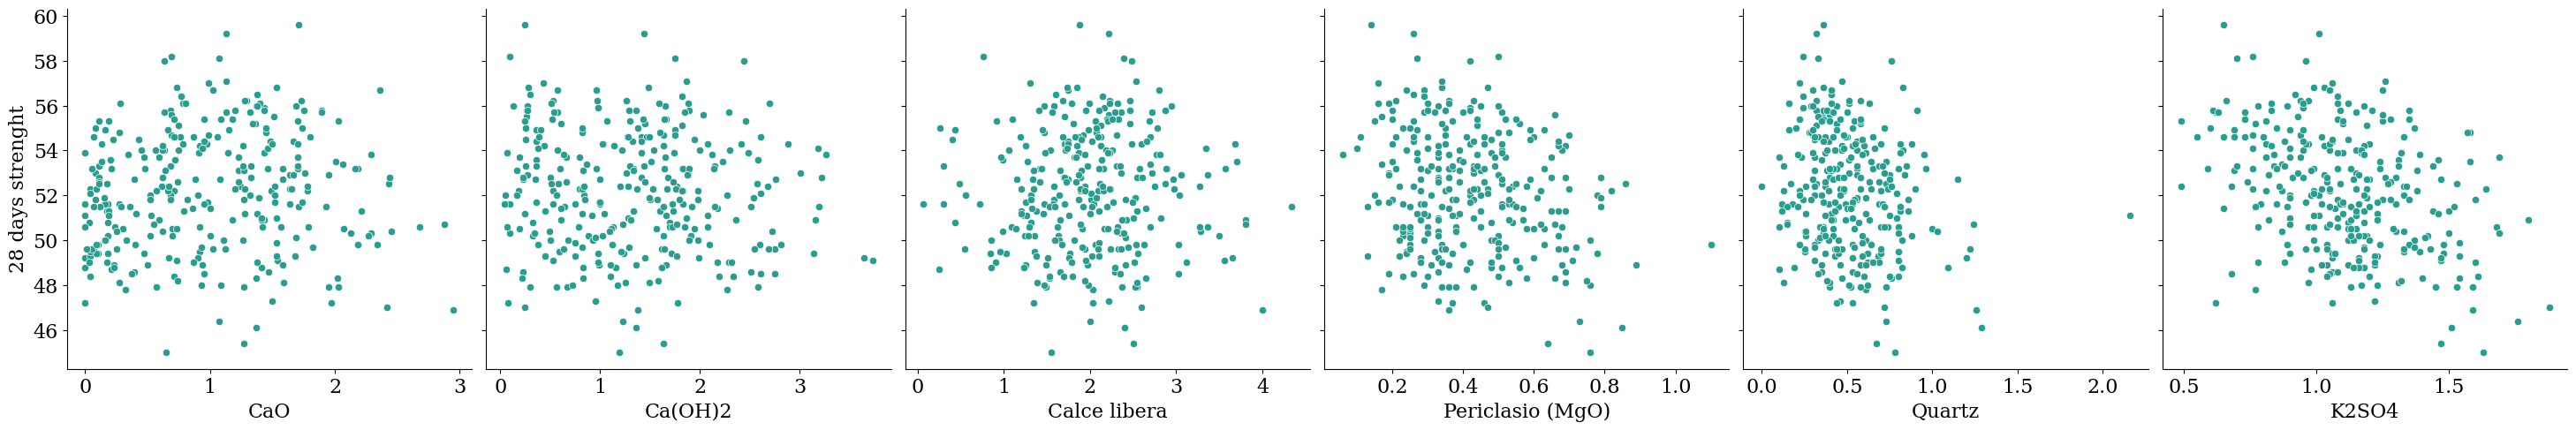

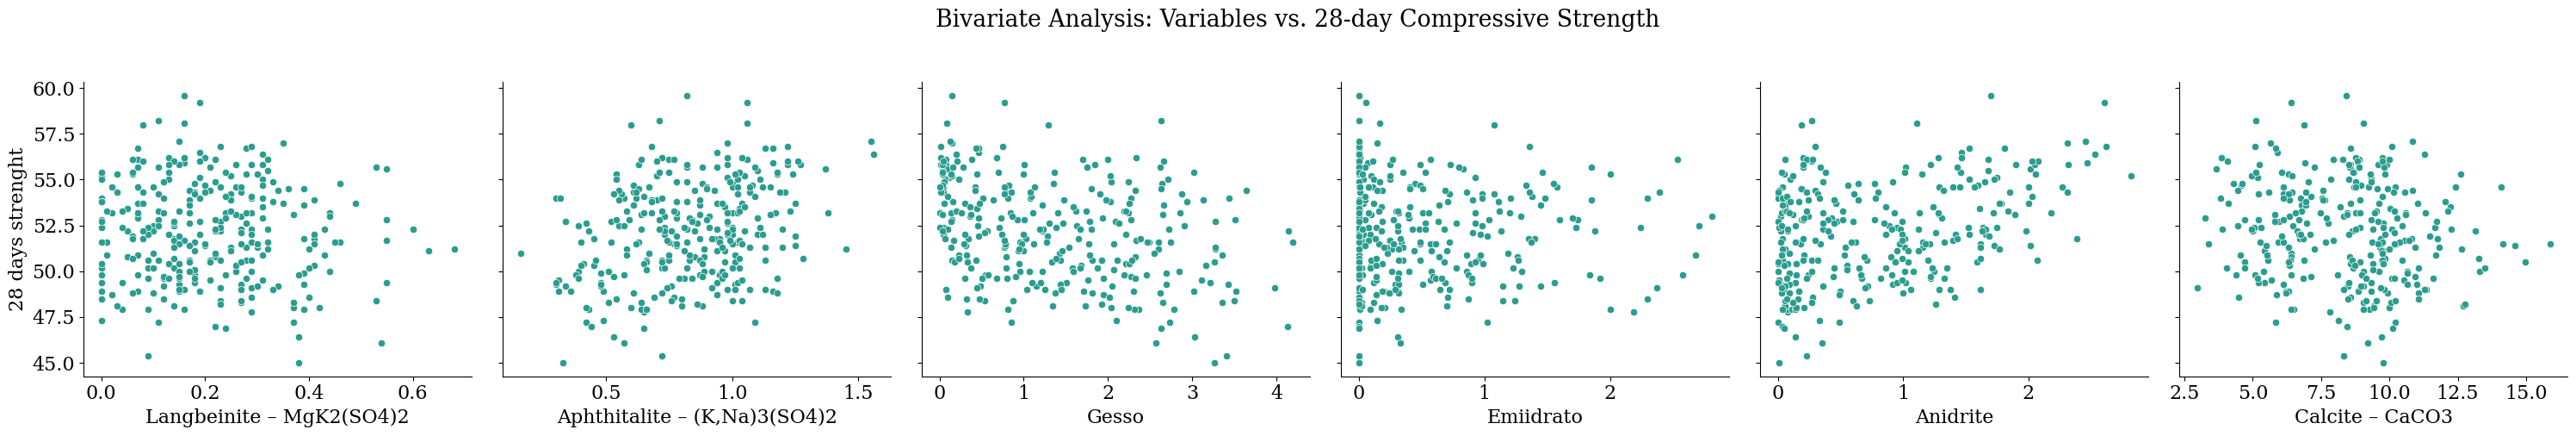

<IPython.core.display.Javascript object>

In [39]:
num_lines = 7
plots_per_line = 6

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("28 days strenght")


for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        data=df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["28 days strenght"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

grid.fig.suptitle(
    "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
)
plt.tight_layout()
plt.show()


In [40]:
# def corrfunc(x, y, ax=None, **kws):
#     """Plot the correlation coefficient in the top left hand corner of a plot."""
#     r, _ = pearsonr(x, y)
#     ax = ax or plt.gca()
#     ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
#     return None

<IPython.core.display.Javascript object>

In [41]:
# for pair in sol[sol > 0.75].index.values:
#     if pair[0] != pair[1]:
#         data = df[[pair[0], pair[1]]].dropna()
#         g = sns.pairplot(
#             data,
#             corner=True,
#             kind="reg",
#             plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
#         )
#         corrfunc(data[pair[0]], data[pair[1]])
#         g.set(xticklabels=[])
#         g.set(yticklabels=[])

# plt.tight_layout()

<IPython.core.display.Javascript object>

### 4. Data/Hora Variable Analyses

In [42]:
dates

0     2019-10-07
1     2019-10-09
2     2019-10-14
3     2019-10-16
4     2019-10-21
         ...    
324   2022-10-26
325   2022-11-02
326   2022-11-03
327   2022-11-07
328   2022-11-09
Name: data, Length: 329, dtype: datetime64[ns]

<IPython.core.display.Javascript object>

In [43]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

325 valid days out of 325


<IPython.core.display.Javascript object>

In [44]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2019, 2020, 2021, 2022}


<IPython.core.display.Javascript object>

In [45]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2019: {10, 11, 12},
 2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}}

<IPython.core.display.Javascript object>

In [46]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2019  10        9
      11        8
      12        7
2020  1         9
      2         9
      3         8
      4        10
      5         8
      6         9
      7         9
      8         9
      9         9
      10        8
      11        9
      12        8
2021  1         8
      2         8
      3        10
      4         8
      5         9
      6         9
      7         8
      8         9
      9         9
      10        7
      11       11
      12        9
2022  1         9
      2         8
      3        10
      4         9
      5         8
      6         9
      7         8
      8        10
      9         8
      10        8
      11        4
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

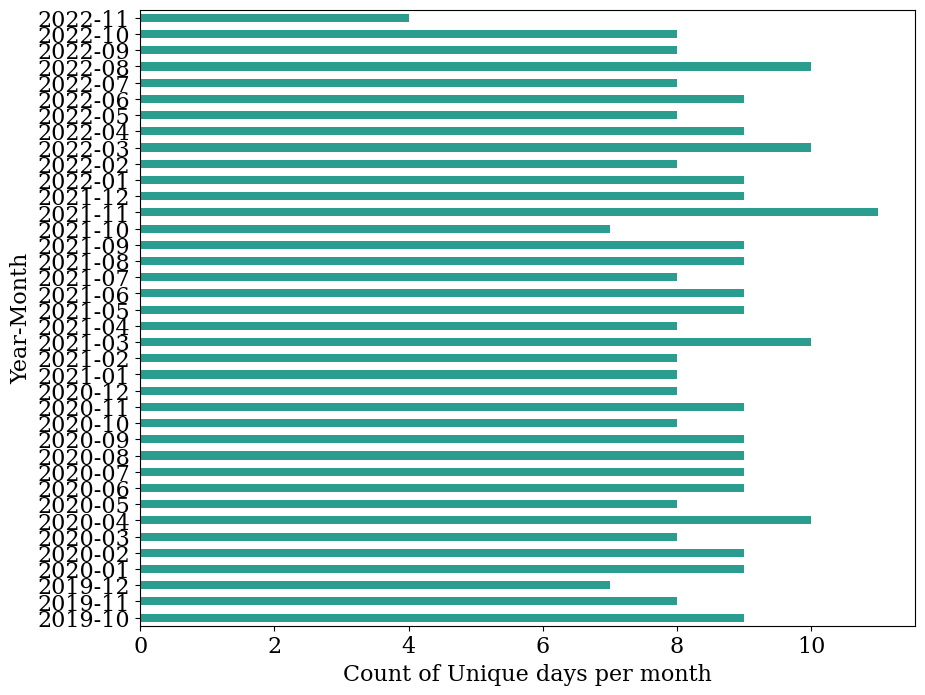

<IPython.core.display.Javascript object>

In [47]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [48]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2019  10        9
      11        8
      12        8
2020  1         9
      2         9
      3         8
      4        10
      5         8
      6        10
      7         9
      8         9
      9         9
      10        8
      11        9
      12        8
2021  1         8
      2         8
      3        10
      4         8
      5         9
      6         9
      7         8
      8         9
      9         9
      10        8
      11       11
      12        9
2022  1         9
      2         9
      3        10
      4         9
      5         8
      6         9
      7         8
      8        10
      9         8
      10        8
      11        4
Name: size, dtype: int64


<IPython.core.display.Javascript object>

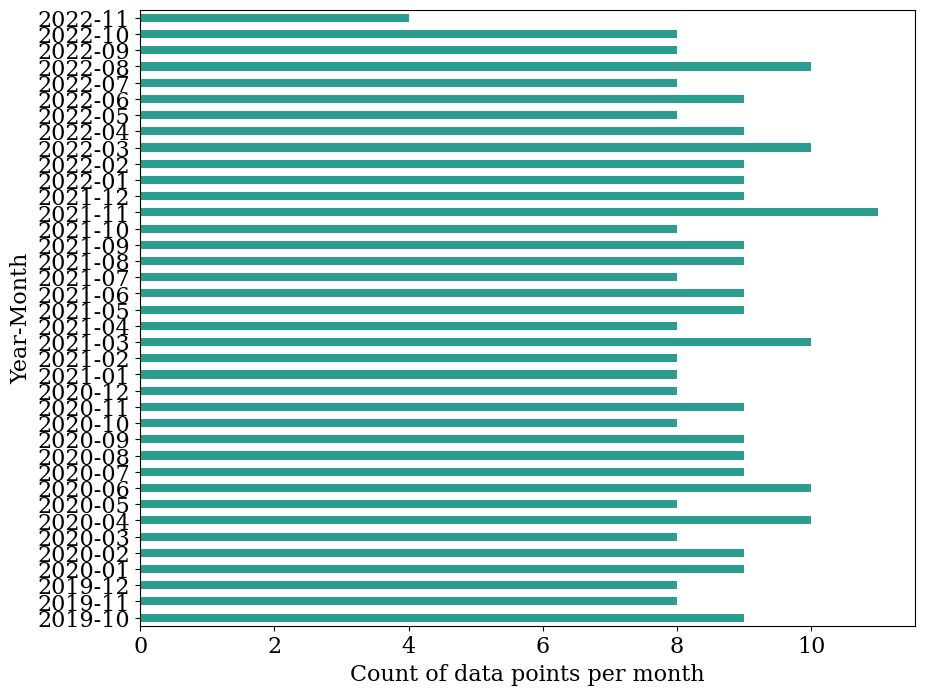

<IPython.core.display.Javascript object>

In [49]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [50]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2022-11 has the minimum number of days with samples - 4
2021-11 has the maximum number of days with samples - 11


<IPython.core.display.Javascript object>

In [51]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  325.000000
mean     1.012308
std      0.110425
min      1.000000
25%      1.000000
50%      1.000000
75%      1.000000
max      2.000000

<IPython.core.display.Javascript object>

In [52]:
day_counts[["DayCount"]].value_counts()

DayCount
1           321
2             4
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [53]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
22   2019     12   17         2
75   2020      6   23         2
211  2021     10   14         2
250  2022      2   24         2

<IPython.core.display.Javascript object>

In [54]:
df_copy = df.copy()
df_copy["date"] = pd.to_datetime(df_copy["data"])
df_copy["Year"] = df_copy["date"].dt.year
df_copy["Month"] = df_copy["date"].dt.month
df_copy["Day"] = df_copy["date"].dt.day

df_merge = df_copy.merge(right=day_counts, how="left", on=["Year", "Month", "Day"])

uniques = df_merge["DayCount"].unique()
uniques.sort()

for daycount in uniques:
    nulls = df_merge[df_merge["DayCount"] == daycount]["28 days strenght"].isna().sum()
    print(daycount, nulls)

1 6
2 0


<IPython.core.display.Javascript object>

In [55]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i] - dates[i - 1])
# diffs

<IPython.core.display.Javascript object>

In [56]:
# Average Frequency
np.mean(diffs)

Timedelta('3 days 10:36:35.121951219')

<IPython.core.display.Javascript object>

In [57]:
Counter(diffs)

Counter({Timedelta('2 days 00:00:00'): 119,
         Timedelta('5 days 00:00:00'): 107,
         Timedelta('1 days 00:00:00'): 42,
         Timedelta('6 days 00:00:00'): 35,
         Timedelta('4 days 00:00:00'): 9,
         Timedelta('3 days 00:00:00'): 7,
         Timedelta('0 days 00:00:00'): 4,
         Timedelta('7 days 00:00:00'): 2,
         Timedelta('10 days 00:00:00'): 1,
         Timedelta('12 days 00:00:00'): 1,
         Timedelta('11 days 00:00:00'): 1})

<IPython.core.display.Javascript object>

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is de

<Axes: xlabel='count'>

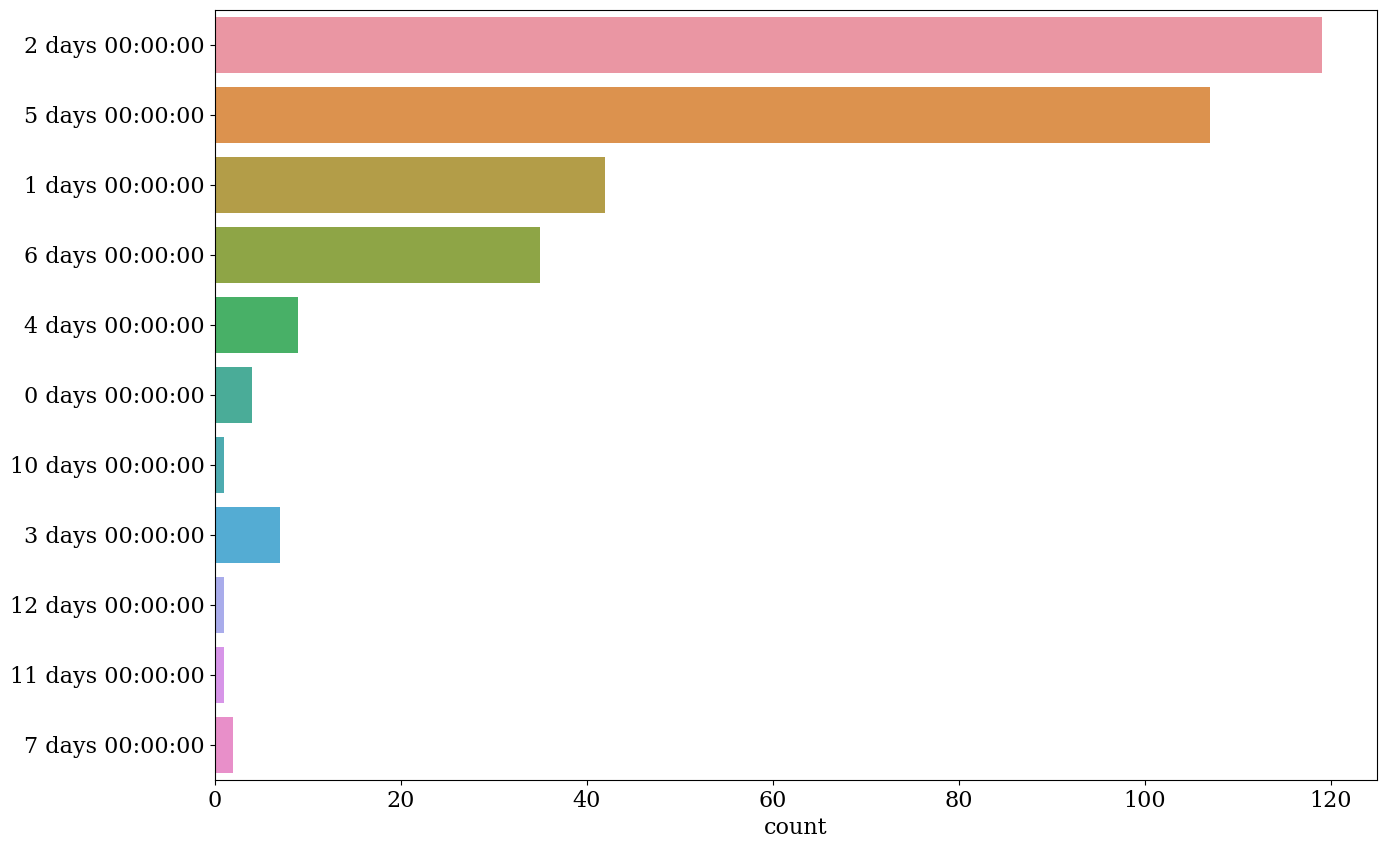

<IPython.core.display.Javascript object>

In [58]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

In [59]:
# percent of diffs
[round(val / df.shape[0] * 100, 2) for val in list(Counter(diffs).values())]

[36.17, 32.52, 12.77, 10.64, 2.74, 1.22, 0.3, 2.13, 0.3, 0.3, 0.61]

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 2 Days

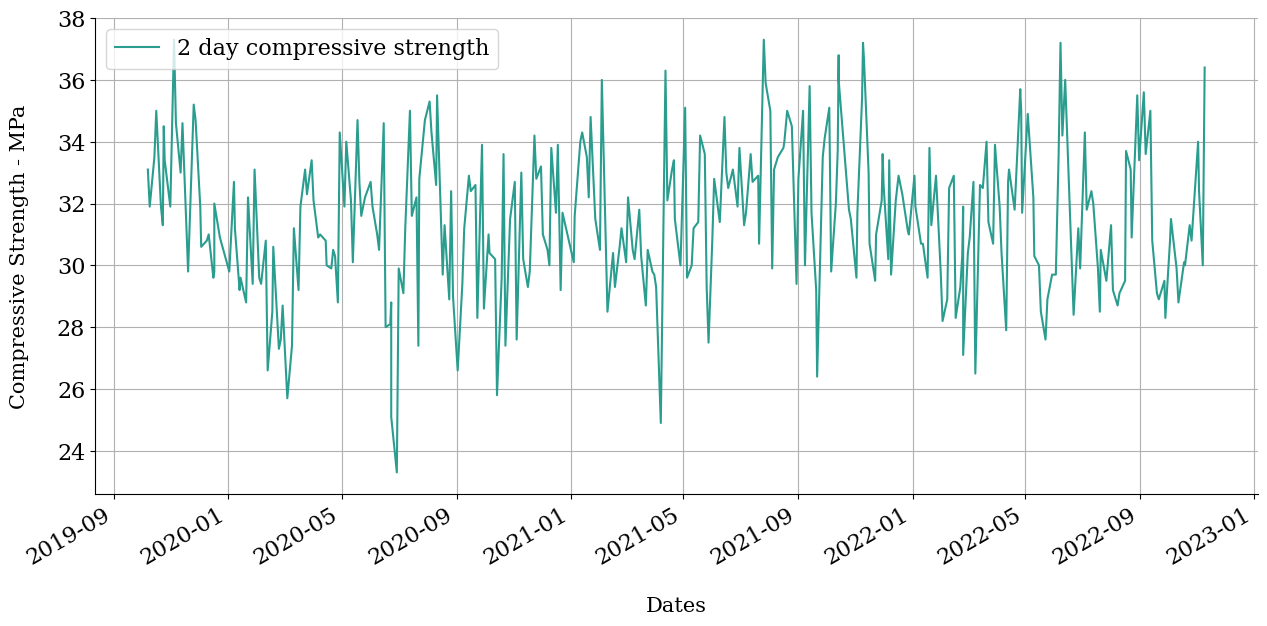

<IPython.core.display.Javascript object>

In [60]:
df["Date"] = pd.to_datetime(pd.to_datetime(df["data"]).dt.date)
tmp = df[["Date", "2 days strenght"]].dropna().copy()
tmp["Date"] = pd.to_datetime(tmp["Date"], format="%d/%m/%Y")
tmp = tmp.set_index("Date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["2 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

#### 7 Days

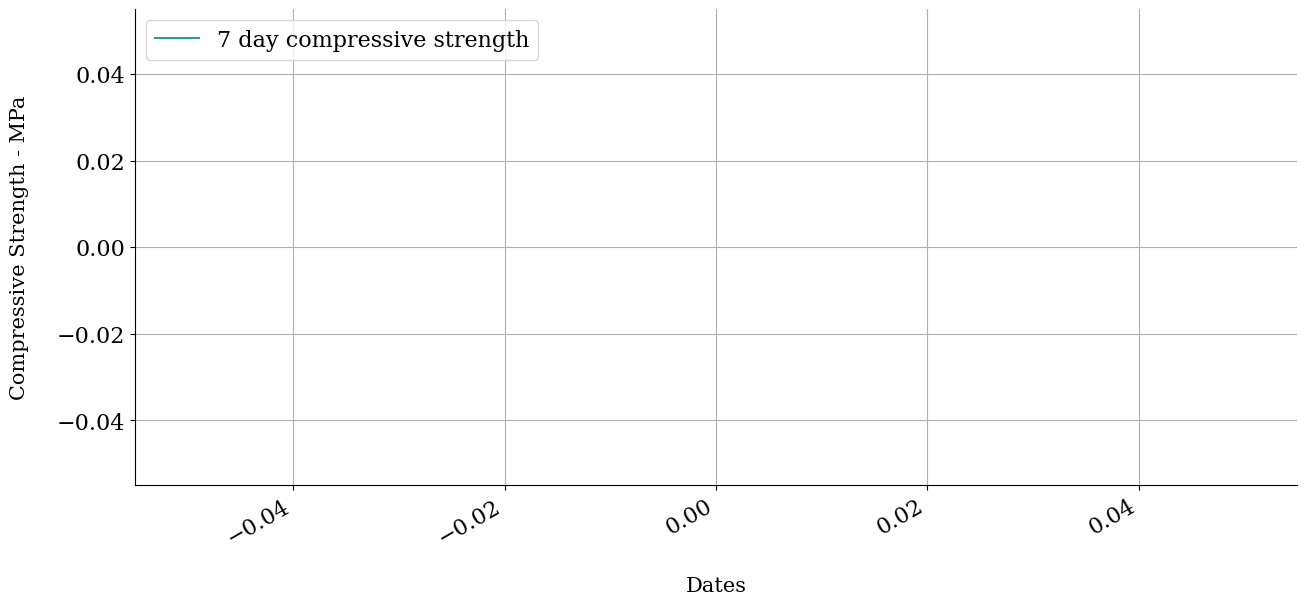

<IPython.core.display.Javascript object>

In [61]:
df["Date"] = pd.to_datetime(pd.to_datetime(df["data"]).dt.date)
tmp = df[["Date", "7 days strenght"]].dropna().copy()
tmp["Date"] = pd.to_datetime(tmp["Date"], format="%d/%m/%Y")
tmp = tmp.set_index("Date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

#### 28 Days

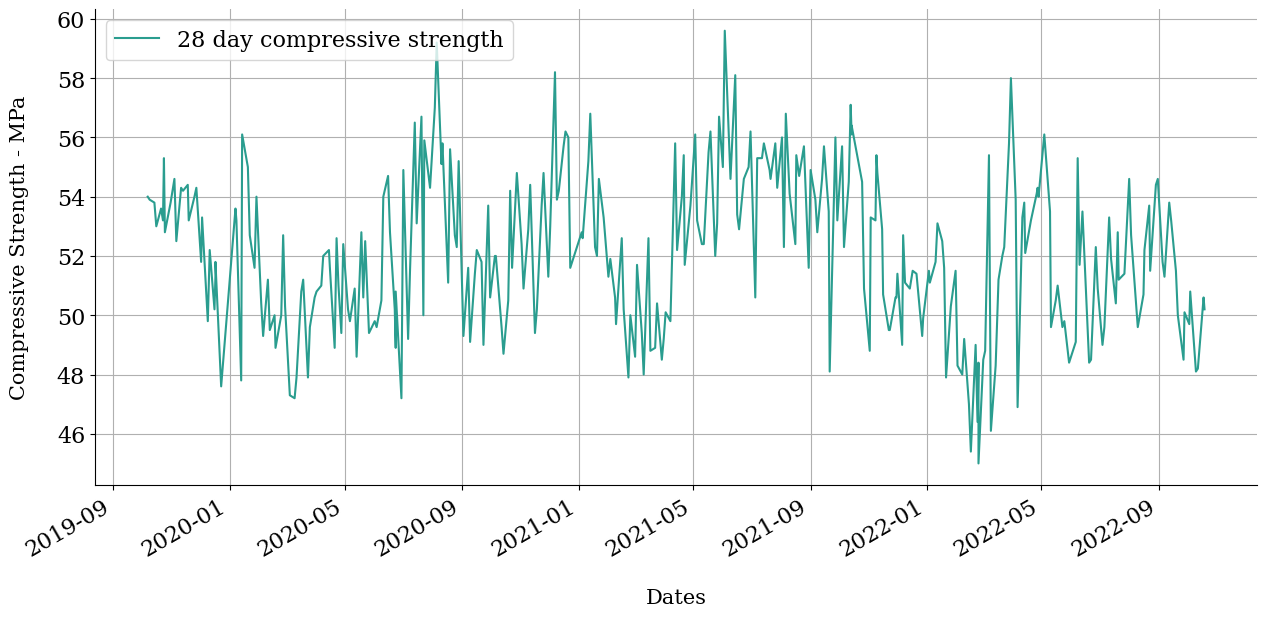

<IPython.core.display.Javascript object>

In [62]:
df["Date"] = pd.to_datetime(pd.to_datetime(df["data"]).dt.date)
tmp = df[["Date", "28 days strenght"]].dropna().copy()
tmp["Date"] = pd.to_datetime(tmp["Date"], format="%d/%m/%Y")
tmp = tmp.set_index("Date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()